# Исследование объявлений о продаже квартир

## Оглавление

1. [Введение](#intro)
2. [Открытие данных](#open)
3. [Предобработка данных](#preprocessing)
    1. [Обработка пропусков](#nulls)
    2. [Изменение типов данных](#types)
    3. [Обработка дубликатов](#duplicates)
    4. [Обработка аномалий](#anomalies)
4. [Добавление новых столбцов](#columns)
5. [Исследовательский анализ данных](#analysis)
    1. [Изучение параметров объектов](#parameters)
    2. [Исследование динамики скорости продажи квартир](#speed)
    2. [Исследование влияния различных факторов на общую стоимость объекта](#factors)
    3. [Исследование цен в населенных пунктах](#cities)
    4. [Средняя цена каждого километра от центра города](#center_price)
6. [Общий вывод](#total)

## Введение <a id="intro"></a>

В нашем распоряжении архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 

По каждой квартире на продажу доступны два вида данных: 
1. Добавленные пользователем. Например, площадь квартиры, её этаж и количество балконов.
2. Полученные автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Задача: выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

## Открытие данных <a id="open"></a>

Загрузим необходимые для работы библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Зададим необходимые константы.

In [2]:
# разделитель столбцов в датасете
DATA_SEP = '\t'

# формат даты в столбце с датами публикации объявления в датасете
DATE_FORMAT = '%Y-%m-%dT%H:%M:%S'

Откроем файл с данными.

In [3]:
data = pd.read_csv('data.csv', sep=DATA_SEP)

Выведем первые 10 строк и общую информацию о датасете.

In [4]:
display(data.head(10))
display(data.info())
data.describe(include='all').T # используем all, чтобы показать все столбцы

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
total_images,23699.0,NaN,NaN,NaN,9.858475,5.682529,0.0,6.0,9.0,14.0,50.0
last_price,23699.0,NaN,NaN,NaN,6541548.771552,10887013.267545,12190.0,3400000.0,4650000.0,6800000.0,763000000.0
total_area,23699.0,NaN,NaN,NaN,60.348651,35.654083,12.0,40.0,52.0,69.9,900.0
first_day_exposition,23699,1491,2018-02-01T00:00:00,368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rooms,23699.0,NaN,NaN,NaN,2.070636,1.078405,0.0,1.0,2.0,3.0,19.0
ceiling_height,14504.0,NaN,NaN,NaN,2.771499,1.261056,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,NaN,NaN,NaN,10.673824,6.597173,1.0,5.0,9.0,16.0,60.0
living_area,21796.0,NaN,NaN,NaN,34.457852,22.030445,2.0,18.6,30.0,42.3,409.7
floor,23699.0,NaN,NaN,NaN,5.892358,4.885249,1.0,2.0,4.0,8.0,33.0
is_apartment,2775,2,False,2725,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Вывод:
- Имеем данные по 23699 квартирам.
- Сразу заметим, что в данных есть аномально выделяющиеся большие значения в некоторых столбцах и много пропусков. Изучим и обработаем их на следующем этапе.

## Предобработка данных <a id="preprocessing"></a>

### Обработка пропусков <a id="nulls"></a>

Судя по общей информации о датасете, пропуски присутствуют во многих столбцах. Выделим отдельно столбцы с пропусками и количество пропущенных значений в них.

In [5]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски присутствуют в столбцах `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition`. Попробуем обработать их.

#### Заполнение пропусков в высоте потолков и этажности домов

Пустые значения поля в высоте потолков `ceiling_height` можно заменить медианными по похожей этажности дома. Но у нас есть пропуски в столбце этажности домов `floors_total`, поэтому для начала заполним их. Можно предположить, что квартиры с пустой этажностью дома находятся на последних этажах, поэтому можем проставить эти значения в пустые поля.

In [6]:
data['floors_total'] = data['floors_total'].fillna(data['floor'])

Перейдем к заполнению пропусков в высоте потолков (`ceiling_height`). Посмотрим какие значание записаны в этом столбце.

In [7]:
data.ceiling_height.dropna().sort_values()

22590      1.00
5712       1.20
16934      1.75
2572       2.00
19329      2.00
          ...  
10773     27.00
21377     27.50
22336     32.00
3148      32.00
22869    100.00
Name: ceiling_height, Length: 14504, dtype: float64

3 значения с высотой потолков меньше 2 метров не значительно повлияют на выборку. Предлагаю их на текущем этапе оставить. Возможно, это уникальные квартиры или ошибка продавцов. А вот квартир высотой, например, 27 метров явно не существует. Скорее всего, продавцы забыли указать десятичную дробь в объявлении.

Чтобы не исказить вычисления, уменьшим в 10 раз значения `ceiling_height` у квартир, где этот показатель превышает 15 метров.

In [8]:
data['ceiling_height'] = data.ceiling_height.where(data.ceiling_height < 15, data.ceiling_height / 10)

Высота потолков может зависеть от количества этажей. Заменим пустые значения поля `ceiling_height` медианными значениями высоты потолков в домах с аналогичным количество этажей. 

In [9]:
for floors_total in data['floors_total'].unique():
    data.loc[
        (data['floors_total'] == floors_total) & 
        (data['ceiling_height'].isna()), 'ceiling_height'
    ] = data.dropna(subset=['ceiling_height']).loc[(data['floors_total'] == floors_total), 'ceiling_height'].median()

Проверим, остались ли пропуски в высоте потолков.

In [10]:
data['ceiling_height'].isna().sum()

1

Осталась 1 квартира с пустым значением высоты потолка. Посмотрим ее данные.

In [11]:
data[data['ceiling_height'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11575,9,9900000.0,101.0,2016-04-28T00:00:00,3,NaN,33.0,53.0,32,False,...,21.0,0.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,53.0


Этажность дома выделенной квартиры 33 этажа. Скорее всего, домов c таким же количеством этажей в выборке больше нет. Можем заменить значение высоты потолка у этой квартиры на медианное значение высоты потолков всех домов выше 30 этажей.

In [12]:
data.loc[
    data['ceiling_height'].isna(), 'ceiling_height'
] = data.loc[(data['floors_total'] > 30), 'ceiling_height'].median()

#### Заполнение жилой площади и площади кухни

Пропуски в жилой площади `living_area` можем заполнить по медианному значению отношения жилой площади к разнице между общей и кухонной в квартирах с аналогичным количеством комнат. 

В некоторых строках могут быть не указаны кухонные площади. Для них можем считать отношение жилой площади к общей.

In [13]:
def fill_area_by_median_ratio(area_fill, area_sub):
    '''
    функция принимает: названия колонки с площадями, которую заполняем и которую вычитаем из общей
    функция заполняет пропуски в площади медианными отношениями заполняемой площади к разнице между общей и второй
    '''   
    # запоминаем пустые ячейки во второй колонке для удобства
    data_na = data[area_sub].isna()
    
    # сначала заполним строки с обоими пустыми колонками
    # перебираем весь датафрейм, так как считаем медианное отношение от общей площади
    # группируем по количеству комнат
    for rooms, group_data in data.dropna(subset=[area_fill]).groupby('rooms'):
        # запоминаем списки из булевых значений строк, которые подходят под анализируемую выборку для удобства
        data_area_fill = (data['rooms'] == rooms) & (data[area_fill].isna()) & (data_na)

        # добавляем столбец с процентами в датасет из цикла
        # считаем отношение площади первой колонки к общей площади
        group_data['percent'] = group_data[area_fill] / group_data['total_area']

        # столбцам с пустыми значениями присваиваем значение, 
        # равное медианному проценту отношения площади первой колонки к общей площади,
        # умноженному на общую площадь текущей квартиры
        data.loc[
            data_area_fill, area_fill
        ] = group_data['percent'].median() * data.loc[data_area_fill]['total_area']
    
    # далее заполним пропуски в строках, где во второй колонке уже есть значения
    # перебираем только строки с непустыми площадями во второй колонке
    for rooms, group_data in data[~data_na].dropna(subset=[area_fill]).groupby('rooms'):
        # запоминаем списки из булевых значений, которые подходят под анализируемую выборку для удобства
        data_area_fill = (data['rooms'] == rooms) & (data[area_fill].isna()) & (~data_na)

        # считаем отношение площади первой колонки к разнице между общей и площадью второй
        group_data['percent'] = group_data[area_fill] / (group_data['total_area'] - group_data[area_sub])

        # столбцам с пустыми значениями присваиваем значение, 
        # равное медианному проценту отношения площади первой колонки к разнице между общей и площадью второй,
        # умноженному на разницу площадей текущей квартиры
        data.loc[
            data_area_fill, area_fill
        ] = group_data['percent'].median() * (
            data.loc[data_area_fill]['total_area'] - data.loc[data_area_fill][area_sub]
        )

# заполняем пропуски в жилой площади
fill_area_by_median_ratio('living_area', 'kitchen_area')

Значения в площади кухни `kitchen_area` сразу не можем заполнить по аналогии с жилой, так как некоторые пропуски могут относиться к квартирам-студиям с нулевым количеством комнат. В них нет отдельного помещения под кухню, поэтому пользователи в таком случае могли указывать пустые значения. Проверим, есть ли в датасете студии, у которых указана площадь кухни.

In [14]:
data[(data['studio'] == True) & (data['kitchen_area'] > 0)]['studio'].count()

0

Как и предполагалось, во всех студиях не указана площадь кухни. Значит, можем указать нулевое значение в параметре `kitchen_area` для таких квартир.

In [15]:
data.loc[data['studio'] == True, 'kitchen_area'] = 0

Заполним остальные пропуски в кухонной площади по медианному проценту отношения кухонной площади к разнице между общей и жилой в квартирах с аналогичным количеством комнат, по аналогии с заполнением пропусков в жилой площади.

In [16]:
fill_area_by_median_ratio('kitchen_area', 'living_area')

Проверим, есть ли в данных квартиры, у которых сумма кухни и жилой площади превышает общую площадь квартиры.

In [17]:
data[data['living_area'] + data['kitchen_area'] > data['total_area']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
184,7,2600000.0,30.20,2018-02-14T00:00:00,1,2.65,9.0,26.10,5,NaN,...,6.20,NaN,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
545,9,4700000.0,23.80,2018-12-28T00:00:00,1,2.70,18.0,20.00,9,NaN,...,5.00,NaN,Санкт-Петербург,9731.0,11849.0,0.0,NaN,0.0,NaN,108.0
551,8,3100000.0,31.59,2018-03-08T00:00:00,1,2.70,19.0,30.55,2,NaN,...,9.28,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,70.0
601,12,5600000.0,53.70,2017-04-18T00:00:00,2,2.50,12.0,48.30,5,NaN,...,7.00,2.0,Санкт-Петербург,50477.0,13252.0,2.0,220.0,1.0,1250.0,167.0
696,1,3364930.0,34.69,2014-11-27T00:00:00,1,2.64,25.0,23.43,25,NaN,...,23.43,2.0,Санкт-Петербург,43396.0,12153.0,0.0,NaN,0.0,NaN,574.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21824,20,2450000.0,44.00,2019-02-12T00:00:00,2,2.70,2.0,38.00,2,False,...,8.60,2.0,городской поселок Большая Ижора,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21868,12,2600000.0,34.30,2018-09-26T00:00:00,1,2.50,9.0,30.60,6,NaN,...,8.00,2.0,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,107.0
21915,14,11990000.0,91.40,2016-05-16T00:00:00,2,2.70,16.0,62.00,12,NaN,...,32.40,0.0,Санкт-Петербург,10934.0,12551.0,0.0,NaN,0.0,NaN,93.0
21956,0,5200000.0,46.00,2018-07-20T00:00:00,2,2.55,5.0,44.00,5,NaN,...,8.00,1.0,Санкт-Петербург,14103.0,15182.0,1.0,488.0,0.0,NaN,7.0


Таких квартир довольно много. Значения жилых и кухонных площадей в них не могут быть реальными. Ошибки могут носить полностью случайный характер. Например, пользователи при заполнении могли опечататься, или указать неверные данные, или в квартире сделан антрессольный этаж, площадь которого не указана в общей, но посчитана в жилой. Так как мы не знаем реальных показателей, то попробуем заменить жилые и кухонные площади в этих кварирых по медианному проценту, по аналогии с пропусками выше.

In [18]:
# присвоим данным в проблемных строках пустые значения
data.loc[data['living_area'] + data['kitchen_area'] > data['total_area'], ['living_area', 'kitchen_area']] = np.nan

# обработаем данные в проблемных строках функцией для заполнения пропусков в площадях
fill_area_by_median_ratio('living_area', 'kitchen_area')
fill_area_by_median_ratio('kitchen_area', 'living_area')

Проверим, остались ли в датасете квартиры в превышенной суммой площадей, чтобы убедиться, что наши преобразования не ломают данные.

In [19]:
data[data['living_area'] + data['kitchen_area'] > data['total_area']]['total_area'].count()

0

Функция для преобразования площадей работает правильно. Квартир с превышенными суммами площадей не появилось, значит данные не портятся.

#### Заполнение апартаментов и количества балконов

Скорее всего, квартиры с пустым значением поля `is_apartment` не являются апартаментами, а в квартирах с пустым полем `balcony` нет балконов, поэтому пользователи могли не указывать эти параметры в объявлении. Заполним пропуски в этих столбцах значениями `False` и `0` соответственно.

In [20]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['balcony'] = data['balcony'].fillna(0)

#### Заполнение расстояний до центра города и до аэропорта

Пропуски в расстояниях `airports_nearest` и `cityCenters_nearest` можем заполнить значениями аналогичных квартир, в таком же населенном пункте, у которых совпадают расстояния до центра города или аэропорта соответственно.

In [21]:
def fill_value_by_2_other(col_fill, col_sub1, col_sub2):
    '''
    функция принимает: название заполняемого столбца и 2 сравниваемых столбца
    функция заполняет значения в столбце по совпадающим 2 другим
    '''
    # перебираем все индексы с пропущенными значениями, и ищем строки, где совпадают 2 других параметра
    # пропускаем строки с пустыми сравниваемыми столбцами, так как не сможем без них посчитать
    for index in data[data[col_fill].isna()].dropna(subset=[col_sub1, col_sub2]).index:
        # использована конструкция try на случай попадания в значения NaN
        # используем dropna, чтобы убрать пустые значения из списка
        # итоговое значение берем первое из полученного списка, тк если там будет несколько элементов, то они будут одинаковые
        try:
            data.loc[index, col_fill] = data[
                (data[col_sub1] == data.loc[index][col_sub1]) & 
                (data[col_sub2] == data.loc[index][col_sub2])
            ].dropna(subset=col_fill)[col_fill].unique()[0]
        except:
            pass
        
# заполняем поля с расстояниями по 2 другим
fill_value_by_2_other('airports_nearest', 'locality_name', 'cityCenters_nearest')
fill_value_by_2_other('cityCenters_nearest', 'locality_name', 'airports_nearest')

Проверим, остались ли еще пропуски в этих столбцах.

In [22]:
print('Количество строк с пустыми расстояниями до аэропорта: ', data['airports_nearest'].isna().sum())
print('Количество строк с пустыми расстояниями до центра: ', data['cityCenters_nearest'].isna().sum())

Количество строк с пустыми расстояниями до аэропорта:  5526
Количество строк с пустыми расстояниями до центра:  5519


Судя по отличающемуся количеству пропусков, в датасете еще остались строки, в которых одно из изучаемых значений пустое. Можем заполнить данные в них по медианной разнице между расстоянием до центра и аэропорта у ближайших домов в радиусе 250 метров.

In [23]:
def fill_nearest_by_median_difference(col_fill, col_sub, radius):
    '''
    функция принимает: название заполняемого и сравниваемого поля, радиус поиска
    функция заполняет значения медианными у ближайших домов
    '''
    # пропусаем строки с пустыми расстояниями, так как не сможем без них посчитать
    for index in data[data[col_fill].isna()].dropna(subset=[col_sub]).index:
        # запоминаем срез строк с квартирами, которые находятся в заданном радиусе от изучаемой
        # также удаляем строки с пустыми значениями заполняемых расстояний
        homes_around = data[
                (data[col_sub] > data.loc[index][col_sub] - radius) & 
                (data[col_sub] < data.loc[index][col_sub] + radius)
            ].dropna(subset=[col_fill])
        
        # заполняем пропуски суммой значения во втором столбце и медианной разницей первого и второго столбца у ближайших домов
        data.loc[index, col_fill] = (
            data.loc[index, col_sub] + (homes_around[col_fill] - homes_around[col_sub]).median()
        )
        
# заполняем пропуски в расстояниях по домам в ближайшем радиусе
fill_nearest_by_median_difference('airports_nearest', 'cityCenters_nearest', 250)
fill_nearest_by_median_difference('cityCenters_nearest', 'airports_nearest', 250)

#### Заполнение расстояний до парков и водоемов

Можем предположить, что некоторые пропуски в расстояниях `parks_nearest` и `ponds_nearest` связаны с тем, что в радиусе 3 км от таких квартир нет парков или водоемов. Заменим их на значения `3001`.

In [24]:
data.loc[(data['parks_nearest'].isna()) & (data['parks_around3000'] == 0), 'parks_nearest'] = 3001
data.loc[(data['ponds_nearest'].isna()) & (data['ponds_around3000'] == 0), 'ponds_nearest'] = 3001

#### Заполнение названий населенных пунктов

Пропуски в названиях населенных пунктов `locality_name` можем заполнить значениями аналогичных квартир, у которых совпадают расстояния до аэропорта и центра города.

In [25]:
fill_value_by_2_other('locality_name', 'airports_nearest', 'cityCenters_nearest')

Проверим, остались ли еще пропуски в этом столбце.

In [26]:
data['locality_name'].isna().sum()

31

Пропуски еще есть. Заполним их по названию населенного пункта домов, которые находятся по близости. Используем цикл для перебора ближайших расстояний до аэропорта/центра и поиска населенных пунктов в них.

In [27]:
def fill_locality_by_nearest_around(radius):
    '''
    функция принимает: радиус поиска
    функция заполняет значение названия найденного населенного пункта в радиусе поиска
    '''
    # пропускаем строки с пустыми значениями заполняемых расстояний, так как без них посчитать не сможем
    for index in data[data['locality_name'].isna()].dropna(subset=['airports_nearest', 'cityCenters_nearest']).index:
        # запоминаем список названий населенных пунктов с квартирами в ближайшем радиусе
        locality_around = data[
            (data['airports_nearest'] > data.loc[index]['airports_nearest'] - radius) & 
            (data['airports_nearest'] < data.loc[index]['airports_nearest'] + radius) &
            (data['cityCenters_nearest'] > data.loc[index]['cityCenters_nearest'] - radius) & 
            (data['cityCenters_nearest'] < data.loc[index]['cityCenters_nearest'] + radius)
        ].dropna(subset=['locality_name'])['locality_name'].unique()

        # если нашелся 1 населенный пункт, то присваиваем его значение
        if len(locality_around) == 1:
            data.loc[index, 'locality_name'] = locality_around[0]
            
# заведем переменную-счетчик для увеличения радиуса поиска домов
radius = 0

# в цикле проверяем, остались ли еще пропуски в названиях населенных пунктов с непустыми расстояниями
while data.dropna(subset=['airports_nearest', 'cityCenters_nearest'])['locality_name'].isna().sum() > 0:
    # для радиуса больше 100 увеличиваем шаг до 20 метров, чтобы ускорить работу скрипта
    if radius >= 100:
        radius += 20
    # для маленького радиуса проверяем с шагом в 5 метров, чтобы минимизировать попадание в 2 населеннх пункта в проверяемом радиусе
    else:
        radius += 5

    # заполняем пропуски в проверяемом радиусе
    fill_locality_by_nearest_around(radius)

#### Заполнение количества дней активности объявления

Параметр количества дней активности объявления `days_exposition` мог стать пустым, если объявление было закрыто в течение 1 дня. Можем заполнить пропуски в таких квартирах нулевыми значениями.

In [28]:
data['days_exposition'] = data['days_exposition'].fillna(0)

#### Итоги заполнения пропусков

Проверим оставшееся количество пропусков.

In [29]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              8
airports_nearest        5518
cityCenters_nearest     5518
parks_around3000        5518
parks_nearest           5518
ponds_around3000        5518
ponds_nearest           5518
days_exposition            0
dtype: int64

Вывод:

- Пропусков стало заметно меньше, но они все еще есть. Оставшиеся значения пока заменить не можем.
- В большинстве значений пропуски могли носить полностью случайный характер. Например, пользователи могли не указать в своем объявлении высоту потолков, этажность дома, жилую или кухонную площадь, апартаменты, количество балконов, название населенного пункта или точный адрес (без адреса сервис не мог заполнить расстояния).
- Некоторые пропуски в расстояниях до парков и водоемов могли носить неслучайный характер. Например, для домов, рядом с которыми в радиусе 3 км нет ни одного парка или водоема, сервис мог оставить пустые значения расстояний.
- Пропуски в количестве дней публикации могли носить случайный характер. Например, для объявлений, которые были закрыты в день публикации, сервис мог оставить пустые значения количества дней размещения объявления.
- Большинство пропусков удалось заполнить на основе предположений и значений похожих квартир.
- Оставшиеся пустые значения в названиях населенных пунктов оставим как есть. В строках с такими данными пропущены значения в расстояниях, поэтому не удастся найти зависимость с другими значениями.
- Оставшихся пустых значений с расстояниями осталось примерно одинаковое количество. Можем предположить, что сервис не мог вычислить координаты для таких квартир по какой-то причине. Например, для очень отдаленных населенных пунктов, или при отсутствии точного адреса на карте сервиса.

### Изменение типов данных <a id="types"></a>

Посмотрим текущую информацию об измененном датафрейме, какие типы данных он хранит.

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23691 non-null  object 
 15  airports_nearest   

Тип данных в столбцах `last_price`, `floors_total`, `balcony`, `days_exposition` можем заменить на целый числовой (`int`). Чтобы было удобнее визуализировать данные.
- Если стоимость квартиры была бы дробной, то ее дробная часть (копейки) не сыграли бы большой роли в статистике, так как цены измеряются тысячами и миллионами. 
- Количество этажей и балконов не может быть дробным.
- Количество дней размещения объявления также не может быть дробным. Сервис не учитывал время публикации, считал только даты.

Мы могли бы заменить типы данных в столбцах с количеством парков (`parks_around3000`) и водоемов (`ponds_around3000`) на целые, так как они не могут быть дробными. Но в этих столбцах все еще присутствуют пропуски (`NaN`), которые имеют вечественный тип (`float`). Пропуски убрать не можем, поэтому оставим данные в текущем формате.

Можно заметить, что в большинстве столбцов в таблице используются типы данных со слишком большим диапазоном допустимых значений. Заменим типы данных в них на другие с меньшим диапазоном, чтобы сэкономить память:
- Во всех целых числовых столбцах, кроме `last_price` и `days_exposition`, значения не превышают 127, поэтому можем заменить тип данных в них с `int64` на `int8`.
- В столбце `days_exposition` значения не превышают 32767, поэтому можем перевести их в тип `int16`.
- В столбце `last_price` значения не превышают 2147483647, поэтому можем перевести их в тип `int32`.
- Во всех слобцах с вещественными значениями можем поменять тип данных на `float16`.

In [31]:
# выносим в словарь новые типы данных, и столбцы, которые к ним относятся
data_types = {
    'int8': ['total_images', 'rooms', 'floors_total', 'floor', 'balcony'],
    'int16': ['days_exposition'],
    'int32': ['last_price'],
    'float16': [
        'total_area', 'ceiling_height', 'living_area', 'kitchen_area', 
        'airports_nearest', 'cityCenters_nearest', 
        'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest'
    ]
}

# меняем типы данных на указанные в словаре
for data_type in data_types.keys():
    for column in data_types[data_type]:
        data[column] = data[column].astype(data_type)

Тип данных в столбце `first_day_exposition` стоит заменить на `datetime`, чтобы в дальнейшем с ним было удобнее работать.

In [32]:
# заменяем тип данных в дате публицации, ориентируясь на константу формата даты
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format=DATE_FORMAT)

Изменение типов данных требуется для ускорения работы кода. Посмотрим общую информацию о датасете, и измерим количество сэкономленной памяти.

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int8          
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  float16       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int8          
 5   ceiling_height        23699 non-null  float16       
 6   floors_total          23699 non-null  int8          
 7   living_area           23699 non-null  float16       
 8   floor                 23699 non-null  int8          
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float16       
 13  balcony         

Первоначальный датасет занимал 3.5 МБ. После преобразований стал занимать 1.1 МБ памяти. Изменение типов данных позволило сократить объем памяти примерно в 3 раза.

### Обработка дубликатов <a id="duplicates"></a>

Проверим, если в датафрейме явные дубликаты.

In [34]:
data.duplicated().sum()

0

Явных дубликатов в данных нет. Но могут присутствовать неявные. Проверим, какие значения находятся в столбце с названиями населенных пунктов `locality_name`.

In [35]:
# сортируем, чтобы удобнее смотреть на список
data.sort_values(by='locality_name')['locality_name'].unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

В списке присутствуют дубликаты населенных пунктов с указанием типа населенного пункта и без него, например, `деревня Кудрово` и `Кудрово`. Также есть дубликаты населенных пунктов с типами, которые прописаны разными словами, например `поселок Рябово` и `поселок городского типа Рябово`, либо с разными буквами `е` и `ё` в типе, например, `поселок` и `посёлок`.

Приведем названия подобных населенных пунктов к единому виду. Уберем типы населенных пунктов из всех названий.

In [36]:
def delete_type_from_locality_name(locality_name):
    '''
    функция принимает: исходное название населенного пункта
    функция возвращает: название населенного пункта без указания его типа
    '''
    # конструкция try используется, так как в данных есть пропуски (NaN) вещественного типа, эти данные не обрабатываем
    try:
        # стираем все символы в названии до первой заглавной буквы (непосредственно названия населенного пункта)
        while not locality_name[0].isupper():
            locality_name = locality_name[1:]
        return locality_name
    except:
        return locality_name

# анализируем все значения в столбце, и заменяем там, где нужно
data['locality_name'] = data['locality_name'].apply(delete_type_from_locality_name)

### Обработка аномалий <a id="anomalies"></a>

Проверим, присутствуют ли во всех числовых столбцах аномально выделяющиеся значения.

In [37]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.000000e+00,9.000000e+00,1.400000e+01,5.000000e+01
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3.400000e+06,4.650000e+06,6.800000e+06,7.630000e+08
total_area,23699.0,inf,inf,12.0,4.000000e+01,5.200000e+01,6.987500e+01,9.000000e+02
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,1.900000e+01
ceiling_height,23699.0,2.710938e+00,2.653809e-01,1.0,2.550781e+00,2.650391e+00,2.750000e+00,1.400000e+01
floors_total,23699.0,1.067146e+01,6.595802e+00,1.0,5.000000e+00,9.000000e+00,1.600000e+01,6.000000e+01
living_area,23699.0,inf,inf,2.0,1.870312e+01,3.000000e+01,4.231250e+01,4.275000e+02
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.000000e+00,4.000000e+00,8.000000e+00,3.300000e+01
kitchen_area,23699.0,inf,5.898438e+00,0.0,7.000000e+00,9.000000e+00,1.179688e+01,1.211250e+02
balcony,23699.0,5.910798e-01,9.592982e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00


Сразу видим аномально большие значения во многих столбцах, сильно отличающиеся от медианных. Также в некоторых столбцах есть крайне маленькие минимальные значения. Обработаем их.

#### Аномалии в стоимости квартир

Минимальное значение параметра `last_price` равно `12190`. Вряд ли квартира была продана за такую небольшую сумму. Можем предположить, что продавец мог не указать 3 нуля в конце цены. Скорее всего, такая квартира была продана за 12 190 тыс. рублей. Тем более, что медианное значение цен примерно 6,5 млн рублей. 

Посмотрим данные квартир, которые были проданы меньше, чем за 100 тыс. рублей.

In [38]:
data[data['last_price'] < 100000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,40.5,0,Санкт-Петербург,36416.0,9176.0,1.0,805.0,0.0,3000.0,8


Скорее всего, наши утверждения верны. Единственная выделяющаяся 2-комнатная квартира в 9 км от центра Санкт-Петербурга площадью в 109 кв.м вполне могла быть продана за 12.2 млн рублей, а продавец мог не указать тысячи в цене. Заменим это значение на умноженное на 1000.

In [39]:
data.loc[data['last_price'] < 100000, 'last_price'] *= 1000

Посмотрим диаграмму размаха стоимости квартир, чтобы посмотреть на поведение всей выборки.

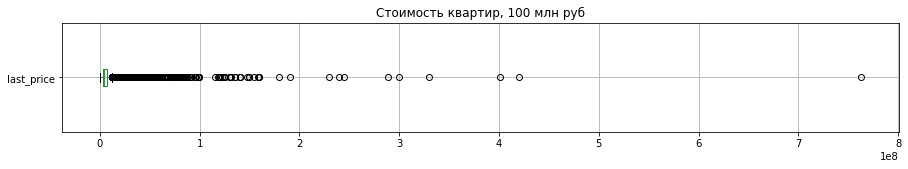

In [40]:
def draw_boxplot(data, column, title):
    '''
    функция принимает: датасет, название колонки, заголовок графика
    функция рисует диаграмму размаха
    '''
    data.boxplot(column=column, grid=True, figsize=(15, 2), vert=False).set_title(title)
    plt.show()

# рисуем диаграмму размаха
draw_boxplot(data, 'last_price', 'Стоимость квартир, 100 млн руб')

По графику видим 11 выделяющихся значений стоимостью больше 170 млн рублей. Предлагаю удалить эти квартиры из выборки. Они встречаются крайне редко, их меньше 0.05% от всего датасета. При их отсутствии вычисления будут чуть значительно меньше искажаться, и графики без них лучше визуализируются. При наличии подобных крайне выделяющихся значений сложно оценить поведение основной части выборки.

In [41]:
# создаем новый датафрейм, куда будем записывать обработанные данные
data_clean = data.query('last_price <= 170000000')

Также на графике было заметно большое количество выбросов примерно больше 15 млн рублей. Просто удалить эти данные пока не можем, так как можем потерять большую часть данных. Оставим их как есть.

#### Аномалии в общей площади квартир

Посмотрим распределение площадей квартир во всем датасете.

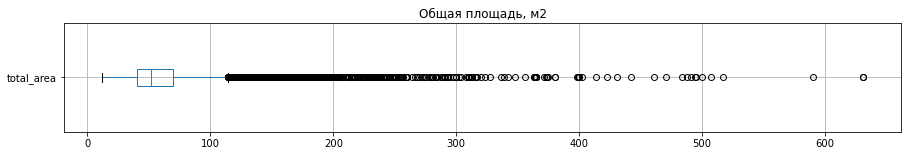

In [42]:
draw_boxplot(data_clean, 'total_area', 'Общая площадь, м2')

В отредактированном датасете видим 3 квартиры с площадью больше 550 кв.м. Можно предположить, что ошибки в данных нет, такие квартиры могут быть реальными, если имеют крайне высокую стоимость. Проверим, какое минимальное значение стоимости у таких квартир. Если оно находится в области выбросов параметра `last_price`, то можем удалить строки с этими значениями, чтобы меньше искажать дальнейшие вычисления.

In [43]:
data_clean[data_clean['total_area'] >= 550]['last_price'].min()

65000000

Как и предполагалось, подобные квартиры стоят сильно больше значений в 3 квартиле диаграммы размаха `last_price`. Поэтому можем удалить строки с этими данными из датасета.

In [44]:
data_clean = data_clean.query('total_area < 550')

#### Аномалии в жилой площади и площади кухни

Посмотрим распределение площадей в текущем датасете.

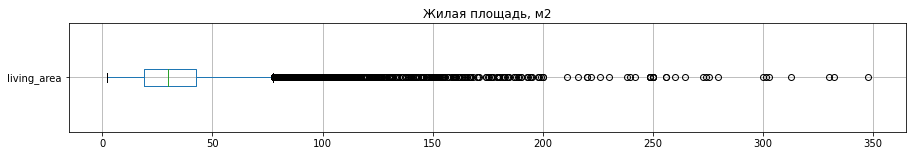

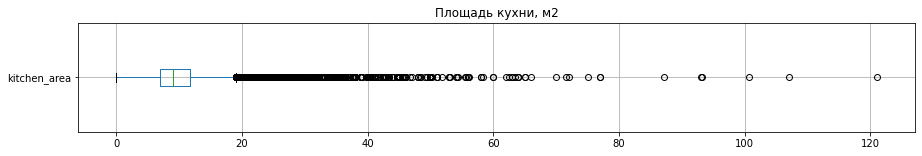

In [45]:
draw_boxplot(data_clean, 'living_area', 'Жилая площадь, м2')
draw_boxplot(data_clean, 'kitchen_area', 'Площадь кухни, м2')

Явных аномалий в данных не заметно. Есть выделяющиеся значения, но если учитывать, что в выборке остались квартиры с площадью меньше 550 кв.м, то подобные максимальные значения выглядят вполне реалистичными.

Однако в общей информации было заметно необычно маленькое минимальное значение жилой площади в 2 кв.м. На диаграмме также видно, что данные начинаются примерно с такого значения. Посмотрим, какие данные всех площадей у квартир с жилой площадью до 5 кв.м.

In [46]:
data_clean[data_clean['living_area'] <= 5].pivot_table(
    values='living_area', index=['total_area', 'kitchen_area']
)

,,living_area
total_area,kitchen_area,
22.0,0.0,5.0
23.0,0.0,2.0
41.0,11.0,3.0
52.0,9.0,2.0
139.0,16.0,3.0


Большинство подобных значений похожи на ошибочные. Например, в квартире общей площадью 139 кв.м вряд ли будет только 3 кв.м жилой. При этом в квартире 22 кв.м вполне реалистично может быть всего 5 кв.м жилой площади. Скорее всего, пользователи забыли указать вторую цифру в некоторых значениях жилой площади.

Умножим аномально маленькие жилые площади на 10 в тех случаях, где полученное значение будет меньше разницы между общей и кухонной, т.е. имеется место под такую жилую площадь.

In [47]:
def change_min_living_area(row):
    '''
    функция принимает: строку датасета
    функция возвращает: значение жилой площади, умноженное на 10, если это позволяет площадь квартиры
    '''
    # запоминаем предполагаемую площадь для удобства
    new_living_area = row['living_area'] * 10
    
    # если остаточная площадь (общая - кухонная) позволяет поместить предполагаемую жилую, то изменяем на это значение
    if row['total_area'] - row['kitchen_area'] >= new_living_area:
        return new_living_area
    # если не позволяет, то оставляем текущее, тк скорее всего, оно реальное
    return row['living_area']

# умножаем аномально маленькие жилые площади на 10 там, где это возможно
data_clean.loc[
    data_clean['living_area'] <= 5, 'living_area'
] = data_clean.loc[data_clean['living_area'] <= 5].apply(change_min_living_area, axis=1)

#### Аномалии в количестве комнат

Посмотрим распределение количества комнат во всем датасете.

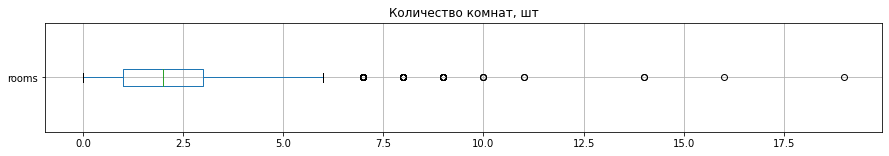

In [48]:
draw_boxplot(data_clean, 'rooms', 'Количество комнат, шт')

По графику видим наличие 4 квартир с количеством комнат > 12. Такие квартиры вполне могут существовать, если относятся к элитным и крайне дорогим. Проверим их минимальную стоимость.

In [49]:
data_clean[data_clean['rooms'] >= 12]['last_price'].min()

25000000

Как и предполагалось, подобные квартиры стоят сильно больше значений в 3 квартиле диаграммы размаха `last_price`. Так как подобных квартир крайне мало, то можем удалить строки с этими данными из датасета, чтобы меньше искажать дальнейшие вычисления.

In [50]:
data_clean = data_clean.query('rooms < 12')

#### Аномалии в высоте потолков

Аномалии в высоте потолков `ceiling_height` мы уже частично обработали при заполнении пропусков. Посмотрим на диаграмму размаха этого показателя в текущем датасете.

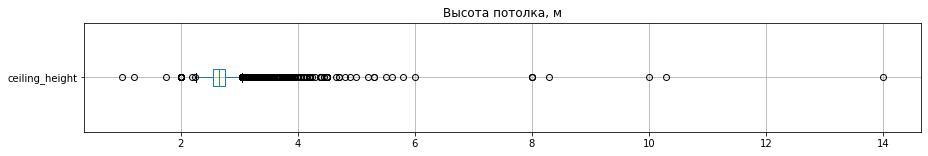

In [51]:
draw_boxplot(data_clean, 'ceiling_height', 'Высота потолка, м')

По графику видим, что есть 3 квартиры с высотой полотков < 2м. Можем предположить, что такие значения были записаны ошибочно. Посмотрим все данные по этим квартирам.

In [52]:
data_clean[data_clean['ceiling_height'] < 2]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5712,5,1500000,42.8125,2017-08-14,2,1.200195,2,27.50000,1,False,...,5.199219,0,Мга,NaN,NaN,NaN,NaN,NaN,NaN,248
16934,5,4100000,40.0000,2017-10-17,1,1.750000,37,17.40625,5,False,...,8.343750,0,Санкт-Петербург,18736.0,20448.0,0.0,3000.0,3.0,80.0,71
22590,16,6000000,55.0000,2018-10-31,2,1.000000,12,32.40625,7,False,...,10.000000,0,Санкт-Петербург,33056.0,14216.0,2.0,293.0,2.0,289.0,13


Скорее всего такая высота потолков была указана ошибочно. Можем заменить аномально маленькие значения в этих квартирах медианным значением высоты потолков в подобных домах:
- Для 2 квартир в Санкт-Петербурге можем найти похожие квартиры по расстоянию до аэропорта и центра города.
- Для квартиры в населенном пункте Мга можем найти похожие квартиры по аналогичной этажности в этом населенном пункте.

In [53]:
def fill_median_ceiling_height_by_2_columns(index, column1, column2):
    '''
    функция принимает: индекс заполняемой строки, названия анализируемых колонок
    функция заполняет высоту потолка в заданном индексе по медианному значению у домов с такими же значениями заданных колонок
    '''
    data_clean.loc[index, 'ceiling_height'] = data_clean[
        (data_clean[column1] == data_clean.loc[index, column1]) & 
        (data_clean[column2] == data_clean.loc[index, column2])
    ]['ceiling_height'].median()

def fill_median_ceiling_height(index):
    '''
    функция принимает: индекс заполняемой строки
    функция выбирает способ заполнения высоты потолка в заданном индексе и запускает соответствующий метод
    '''
    # если есть данные в расстоянии до центра города, то ищем похожие квартиры по расстояниям
    if data_clean.loc[index, 'cityCenters_nearest'] > 0:
        fill_median_ceiling_height_by_2_columns(index, 'airports_nearest', 'cityCenters_nearest')
    # если в растояниях пустота, то ищем в таком же населенном пункте дома с аналогичной этажностью
    else:
        fill_median_ceiling_height_by_2_columns(index, 'locality_name', 'floors_total')
        
# заполняем значения в проблемных строках
for index in data_clean[data_clean['ceiling_height'] < 2].index:
    fill_median_ceiling_height(index)

Можем предположить, что квартиры высотой потолка 5-6 метров вполне могут быть реальными, например, если они 2-этажные. На графике есть несколько выделяющихся из выборки квартир, у которых высота больше 7 метров. Посмотрим, какие данные записаны в строки с ними.

In [54]:
data_clean[data_clean['ceiling_height'] > 7]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3474,3,1400000,30.00000,2018-03-16,1,8.000000,5,15.296875,2,False,...,7.300781,0,Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125
5863,20,5650000,45.00000,2018-08-15,1,8.296875,16,19.296875,14,False,...,8.296875,1,Санкт-Петербург,13072.0,10760.0,0.0,3000.0,1.0,613.0,14
15061,19,5600000,56.40625,2018-05-11,2,14.000000,14,32.406250,5,False,...,9.101562,2,Санкт-Петербург,14816.0,13608.0,0.0,3000.0,0.0,3000.0,315
15743,14,5600000,67.00000,2016-11-11,3,8.000000,16,41.000000,1,False,...,8.000000,0,Санкт-Петербург,32688.0,11032.0,1.0,723.0,0.0,3000.0,474
17442,0,5350000,54.00000,2015-06-16,2,8.000000,5,29.000000,2,False,...,10.000000,1,Красное Село,24640.0,28064.0,0.0,3000.0,0.0,3000.0,469
22309,20,5300000,45.00000,2017-09-30,1,10.296875,16,15.500000,15,False,...,13.976562,0,Санкт-Петербург,36352.0,11936.0,2.0,440.0,2.0,450.0,136
22869,0,15000000,25.00000,2018-07-25,1,10.000000,5,14.000000,5,True,...,11.000000,5,Санкт-Петербург,34976.0,8280.0,1.0,223.0,3.0,30.0,19


Какие видим особенности:
- Апартаменты на последнем этаже 5-этажного дома с высотой потолка 10 метров вполне могут существовать. Но так как это единственная подобная квартира, то можем удалить ее из выборки, чтобы не искажать анализ.
- У одной из квартир полностью совпадает количество этажей и высота потолка. Вероятно, при заполнении случайно продублировали значение в другой параметр.
- У остальных квартир зависимостей не заметно. Возможно, при заполнении вместо высоты в 2.8 метров пользователи указали 8. Возможно, вместо высоты 3.8 указали зеркальное 8.3 метра. 

Удалим уникальные апартаменты из выборки. А высоту потолка в остальных квартирах попробуем заменить на медианные значения в похожих домах, по аналогии с заменами выше.

In [55]:
# удаляем аномальные апартаменты по индексу
data_clean.drop(labels=[
    data_clean.query('is_apartment == True and ceiling_height > 7').index[0]
], axis=0, inplace=True)

# заполняем значения в проблемных строках
for index in data_clean[data_clean['ceiling_height'] > 7].index:
    fill_median_ceiling_height(index)

Проверим, остались ли еще квартиры с аномально большой высотой потолка.

In [56]:
data_clean[data_clean['ceiling_height'] > 7]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
15061,19,5600000,56.40625,2018-05-11,2,8.351562,14,32.40625,5,False,...,9.101562,2,Санкт-Петербург,14816.0,13608.0,0.0,3000.0,0.0,3000.0,315


Осталась 1 подобная квартира. Каких-либо зависимостей у ее данных нет. Других выделяющихся значений тоже. Предлагаю удалить ее из выборки, чтобы не искажать данные, так как заменить высоту потолка на иную мы не можем.

In [57]:
data_clean = data_clean[data_clean['ceiling_height'] < 7]

#### Аномалии в этажах и этажности домов

Посмотрим распределение этажей и этажности домов во всем датасете.

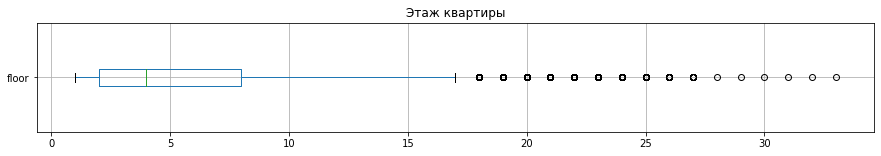

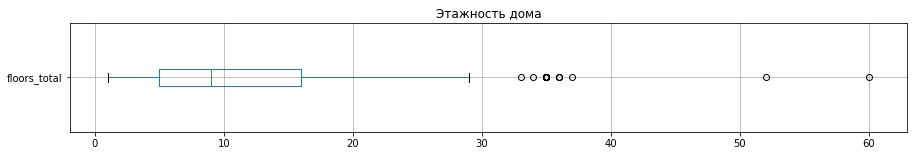

In [58]:
draw_boxplot(data_clean, 'floor', 'Этаж квартиры')
draw_boxplot(data_clean, 'floors_total', 'Этажность дома')

На графике заметны 2 квартиры, у которых указана этажность дома выше 40 этажей. Посмотрим, что это за квартиры. Возможно, в данных есть ошибка или опечатка.

In [59]:
data_clean[data_clean['floors_total'] > 40]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,3800000,45.5,2018-06-28,2,2.880859,60,27.40625,4,False,...,7.398438,0,Кронштадт,inf,49472.0,2.0,342.0,3.0,614.0,166
16731,9,3978000,40.0,2018-09-24,1,2.650391,52,10.50000,18,False,...,14.000000,0,Санкт-Петербург,20736.0,12976.0,1.0,793.0,0.0,3000.0,45


Каких-то зависимостей данных не наблюдаем. Заполнить этажность дома средними или медианными значениями мы не можем, так как нам требуются целые значения в этом столбце. Выделяющиеся 2 квартиры можем удалить из выборки, чтобы меньше искажать данные. 

In [60]:
data_clean = data_clean[data_clean['floors_total'] < 40]

#### Аномалии в количестве балконов

Посмотрим распределение количества балконов во всем датасете. Построим гистограмму, так как вариантов значений всего 6 (от 0 до 5 штук).

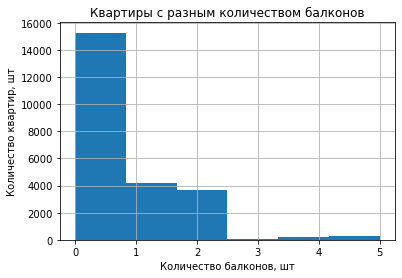

In [61]:
ax = data_clean['balcony'].hist(bins=6, grid=True)
ax.set_xlabel('Количество балконов, шт')
ax.set_ylabel('Количество квартир, шт')
ax.set_title('Квартиры с разным количеством балконов')
plt.show()

Аномалий в данных не наблюдается. Больше всего квартир без балконов. Квартир с 3-5 балконами значительно меньше. Обработка таких данных не требуется, они могут быть вполне реалистичными.

#### Аномалии в расстояниях до аэропорта и центра города

Посмотрим распределение этих расстояний во всем датасете. 

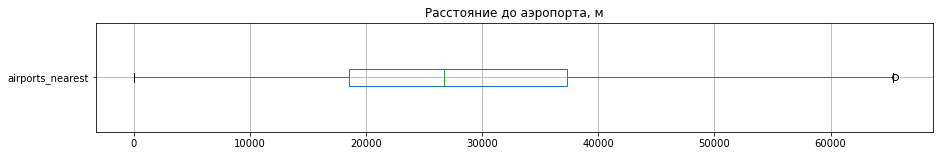

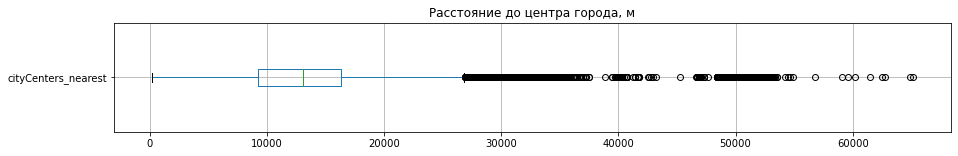

In [62]:
draw_boxplot(data_clean, 'airports_nearest', 'Расстояние до аэропорта, м')
draw_boxplot(data_clean, 'cityCenters_nearest', 'Расстояние до центра города, м')

На графике есть выбросы в крайне больших значениях. Но их довольно большое количество, удалить эти данные не можем. Обработать значения не требуется, так как они могут быть вполне реалистичными. Квартиры в некоторых населенных пунктах действительно могут находиться дальше 60 км от аэропорта или центра города.

А вот непосредственная близость квартиры к аэропорту в 0 метров выглядит не очень реалистично. Вряд ли квартира находится в самом аэропорту. Посмотрим данные всех квартир, которые находятся ближе 100 метров от аэропорта.

In [63]:
data_clean[data_clean['airports_nearest'] < 100]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000000,34.6875,2018-09-23,1,2.699219,9,19.796875,3,False,...,6.0,2,Санкт-Петербург,0.0,22800.0,0.0,3000.0,0.0,3000.0,60


Такая квартира всего одна. Найдем медианную разницу между расстояниями до центра города и аэропорта у квартир, которые находятся в радиусе 500 метров от изучаемой. Найдем такие квартиры, по аналогичным значениям названия населенного пункта, по отличию отдаленности от центра на 500 метров, и по аналогичной отдаленности от парков и водоемов. Присвоим значению `airports_nearest` у проблемной квартиры разницу между ее `cityCenters_nearest` и медианным значением разницы этого параметра и `airports_nearest` у ближайших квартир.

In [64]:
def change_airports_nearest_by_median_difference(row, radius):
    '''
    функция принимает: строку из датасета и радиус поискаа
    функция возвращает: 
    разницу между расстоянием до центра текущей квартиры и медианной разницей расстояний до центра и аэропорта у ближайших квартир
    '''
    # выносим срез данных по аналогичным квартирам в переменную для удобства
    homes_around = data_clean[
        (data_clean['locality_name'] == row['locality_name']) &
        (data_clean['cityCenters_nearest'] > row['cityCenters_nearest'] - radius) & 
        (data_clean['cityCenters_nearest'] < row['cityCenters_nearest'] + radius) &
        (data_clean['parks_nearest'] == row['parks_nearest']) & 
        (data_clean['ponds_nearest'] == row['ponds_nearest'])
    ]
    
    return row['cityCenters_nearest'] - (
        homes_around['cityCenters_nearest'] - homes_around['airports_nearest']
    ).median()

# меняем значение расстояния до аэропорта у аномально близкой к нему квартиры
data_clean.loc[
    data_clean['airports_nearest'] < 100, 'airports_nearest'
] = data_clean.query('airports_nearest < 100').apply(
    change_airports_nearest_by_median_difference, radius=500, axis=1
)

#### Аномалии в расстояниях до парков и водоемов и их количестве в близости 3 км

Посмотрим распределение расстояний до парков и водоемов во всем датасете.

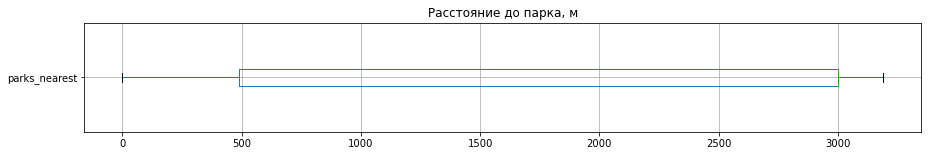

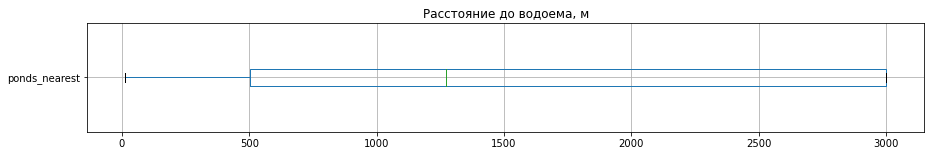

In [65]:
draw_boxplot(data_clean, 'parks_nearest', 'Расстояние до парка, м')
draw_boxplot(data_clean, 'ponds_nearest', 'Расстояние до водоема, м')

Есть квартиры, которые находятся дальше 3 км от парков. При обработке пропусков аналогичным квартирам им были проставлены значения `3001`. Поступим с этими данными также.

In [66]:
data_clean.loc[data['parks_nearest'] > 3000, 'parks_nearest'] = 3001

Посмотрим распределение количества ближайших парков и водоемов во всем датасете. Построим гистограммы, так как вариантов значений всего 4 (от 0 до 3 штук).

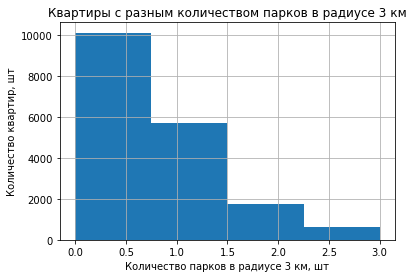

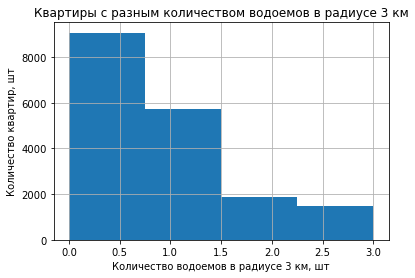

In [67]:
ax = data_clean['parks_around3000'].hist(bins=4, grid=True)
ax.set_xlabel('Количество парков в радиусе 3 км, шт')
ax.set_ylabel('Количество квартир, шт')
ax.set_title('Квартиры с разным количеством парков в радиусе 3 км')
plt.show()

ax = data_clean['ponds_around3000'].hist(bins=4, grid=True)
ax.set_xlabel('Количество водоемов в радиусе 3 км, шт')
ax.set_ylabel('Количество квартир, шт')
ax.set_title('Квартиры с разным количеством водоемов в радиусе 3 км')
plt.show()

Аномалий в данных не наблюдается. Больше всего квартир продавалось без парков или водоемов в близости 3 км.

#### Аномалии в количестве дней активности объявления

Посмотрим распределение количества дней активности объявлений во всем датасете.

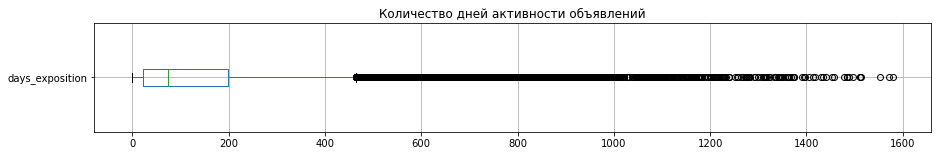

In [68]:
draw_boxplot(data_clean, 'days_exposition', 'Количество дней активности объявлений')

Довольно большое количество квартир не снималось с продажи больше полутора лет. Такие значения могут быть вполне реальными. Квартиры могли продаваться по завышенной цене, или быть неликвидными. Заменять значения не будем. Учтем при расчетах в дальнейшем.

#### Вывод по обработке аномалий

- В данных имеется довольно большое количество выбросов. Постараемся учитывать их при дальнейшем анализе, чтобы меньше искажать результаты. В большинстве случаев выделяющиеся значения могут быть вполне реальными частными случаями, поэтому они были оставлены в выборке.
- Некоторые из найденных аномальных значений удалось изменить, так как их природа могла носить случайный характер. Например, человеческий фактор ошибки при заполнении объявлений.
- Часть данных пришлось удалить. Но так как их количество было крайне мало, то это не должно повлиять на дальнейшие расчеты.

## Добавление новых столбцов <a id="columns"/>

### Добавление цены одного квадратного метра

Посчитаем цену одного квадратного метра у каждой квартиры, как отношение стоимости к общей площади, и вынесем ее в отдельный столбец.

In [69]:
data_clean['m2_price'] = data_clean['last_price'] / data_clean['total_area']

### Добавление дат публикации объявления

Добавим столбцы с:
- днем публикации (где 0 - понедельник, 1 - вторник, и т.д.),
- месяцем публикации,
- годом публикации.

In [70]:
data_clean['exposition_weekday'] = pd.DatetimeIndex(data_clean['first_day_exposition']).weekday
data_clean['exposition_month'] = pd.DatetimeIndex(data_clean['first_day_exposition']).month
data_clean['exposition_year'] = pd.DatetimeIndex(data_clean['first_day_exposition']).year

### Добавление типа этажа квартиры

Добавим в таблицу столбец с типом этажа квартиры, состоящий из значений:
- `первый`,
- `последний`,
- `другой`.

In [71]:
def get_floor_type(row):
    '''
    функция принимает: строку датасета
    функция возвращает: тип этажа квартиры
    '''
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

# добавляем столбец с типом этажа
data_clean['floor_type'] = data_clean.apply(get_floor_type, axis=1)

### Добавление расстояния в км от центра города

Добавим столбец с расстоянием в км от центра города.

In [72]:
data_clean['cityCenters_nearest_km'] = data_clean['cityCenters_nearest'] / 1000

## Исследовательский анализ данных <a id="analysis"/>

### Изучение параметров объектов <a id="parameters"/>

#### Исследование площадей квартиры (общая, жилая, кухонная)

Построим гистограммы для каждого параметра. В диаграммах размаха, которые рисовали выше, были заметны выбросы в значениях больше примерно 110 кв.м общей, 75 кв.м жилой и 20 кв.м кухонной площадей. Не будем отображать эти значения на графике.

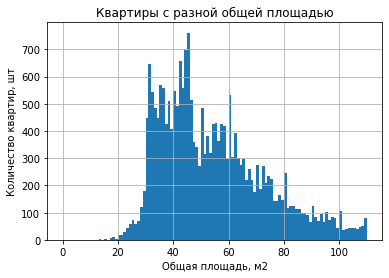

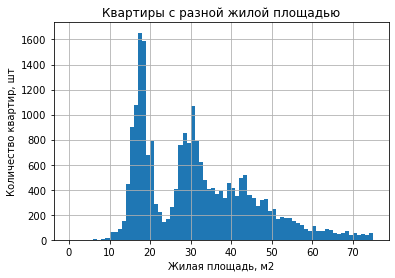

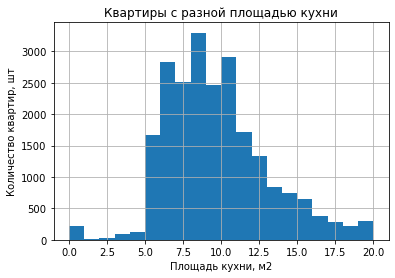

In [73]:
# число корзин равно количеству целых площадей в выборке
ax = data_clean['total_area'].hist(bins=110, grid=True, range=(0, 110))
ax.set_xlabel('Общая площадь, м2')
ax.set_ylabel('Количество квартир, шт')
ax.set_title('Квартиры с разной общей площадью')
plt.show()

ax = data_clean['living_area'].hist(bins=75, grid=True, range=(0, 75))
ax.set_xlabel('Жилая площадь, м2')
ax.set_ylabel('Количество квартир, шт')
ax.set_title('Квартиры с разной жилой площадью')
plt.show()

ax = data_clean['kitchen_area'].hist(bins=20, grid=True, range=(0, 20))
ax.set_xlabel('Площадь кухни, м2')
ax.set_ylabel('Количество квартир, шт')
ax.set_title('Квартиры с разной площадью кухни')
plt.show()

Выводы:

Общая площадь:
- Распределение значений общих и кухонных площадей нормальное. 
- Большая часть квартир имеет общую площадь от 30 до 65 кв.м. 
- Пик значений примерно в 45 кв.м, таких квартир примерно 730. 
- Примерно в 50 кв.м наблюдается небольшая просадка. 
- До 30 и после 60 кв.м идет постепенный спад, квартиры с большей площадью встречаются реже.

Жилая площадь:
- Распределение жилой площади имеет 2 пика. Можем предположить, что этот показатель связан с количеством комнат в квартире. Например, если 1- и 2-комнатные квартиры очень популярны, у них заметная разница в жилой площади. Это также может объяснять просадку в 50 кв.м на гистограмме общей пощади. Учтем это предположение в дальнейшем анализе количества комнат. 
- Большая часть квартир имеет жилую площадь примерно от 15 до 20 кв.м или от 27 до 32 кв.м. 
- Пики значений в 17-18 кв.м, таких квартир примерно 1800. 
- Заметно падение значений на графике от 21 до 25 кв.м, такие квартиры встречаются меньше 300 раз на кв.м. 
- От 32 до 45 кв.м количество квартир мало отличается. 
- До 15 и после 45 кв.м наблюдается спад количества значений, квартиры с такой площадью встречаются реже.

Площадь кухни:
- Большая часть квартир имеет площадь кухни от 6 до 10 кв.м. 
- Пик значений в 8 кв.м, таких квартир примерно 3300. 
- От 13 кв.м начинается постепенный спад, и квартиры с большей площадью кухни встречаются реже. 
- До 5 кв.м квартир крайне мало. При этом выделяются квартиры с нулевой площадью кухни. Их примерно 250. Помним, что это квартиры-студии.

#### Исследование цен

Построим гистограмму количества объявлений с разной стоимостью объекта. В диаграмме размаха, которую рисовали выше, были заметны выбросы в значениях больше примерно 15 млн рублей. Не будем отображать эти значения на графике.

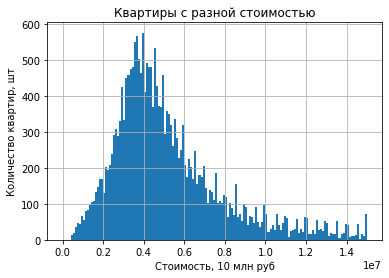

In [74]:
ax = data_clean['last_price'].hist(bins=150, grid=True, range=(0, 15000000))
ax.set_xlabel('Стоимость, 10 млн руб')
ax.set_ylabel('Количество квартир, шт')
ax.set_title('Квартиры с разной стоимостью')
plt.show()

Вывод:
- Распределение значений цен у изучаемых объектов нормальное.
- Большая часть квартир имеет стоимость от 2.5 до 6 млн рублей. 
- Пики значений около 3.6 и 3.9 млн рублей, таких квартир около 570. 
- До и после пиковых значений наблюдается спад, квартиры с такой стоимостью встречаются реже.

#### Исследование количества комнат

Построим гистограмму для этого параметра. В диаграмме размаха, которую рисовали выше, были заметны выбросы в значениях больше 6 комнат. Не будем отображать эти значения на графике.

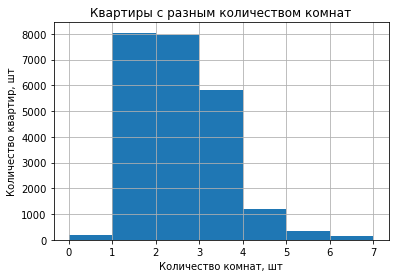

In [75]:
# количество корзин равно количеству значений в выборке
ax = data_clean['rooms'].hist(bins=7, grid=True, range=(0, 7))
ax.set_xlabel('Количество комнат, шт')
ax.set_ylabel('Количество квартир, шт')
ax.set_title('Квартиры с разным количеством комнат')
plt.show()

Вывод:
- Распределение значений количества комнат у изучаемых квартир нормальное.
- Большая часть квартир имеет 1 или 2 комнаты (их по примерно в 8000), чуть реже 3 (около 5800). Это объясняет 2 пиковых значения на гистограмме жилых площадей. 
- Квартиры-студии и квартиры с 4 и больше комнатами встречаются реже.

#### Исследование высоты потолков

Построим гистограмму для этого параметра. В диаграмме размаха, которую рисовали выше, были заметны выбросы в значениях примерно меньше 2.2 и больше 3.5 метров. Не будем отображать эти значения на графике.

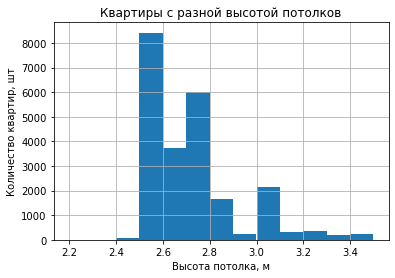

In [76]:
ax = data_clean['ceiling_height'].hist(bins=13, grid=True, range=(2.2, 3.5))
ax.set_xlabel('Высота потолка, м')
ax.set_ylabel('Количество квартир, шт')
ax.set_title('Квартиры с разной высотой потолков')
plt.show()

Вывод:
- Большая часть квартир имеет высоту потолка 2.5 метра и 2.7 метров.
- Пик значений на 2.5 метрах. Таких квартир около 8500.
- Небольшой популярностью пользуются квартиры с высотой в 2.6 и 3 метра. Но они встречаются в 2-3 раза реже популярных.
- Квартир с другой высотой мало, меньше 500 вариантов на метр.

#### Исследование количества этажей (этаж квартиры, тип этажа, этажность дома)

Построим гистограммы для каждого параметра. В диаграммах размаха, которые рисовали выше, были заметны выбросы в значениях больше 17 этажа квартиры, и 30 этажей в доме. Не будем отображать эти значения на графике.

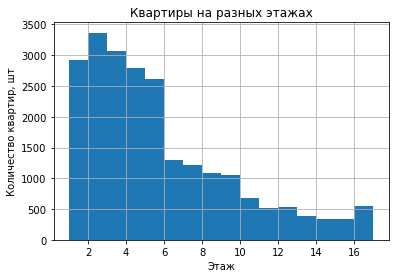

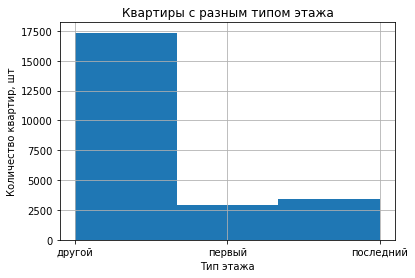

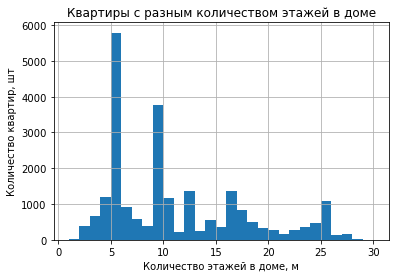

In [77]:
# число корзин равно количеству значений в выборке
# количество этажей считаем от 1, т.к. нулевого этажа не бывает
ax = data_clean['floor'].hist(bins=16, grid=True, range=(1, 17))
ax.set_xlabel('Этаж')
ax.set_ylabel('Количество квартир, шт')
ax.set_title('Квартиры на разных этажах')
plt.show()

ax = data_clean['floor_type'].hist(bins=3, grid=True)
ax.set_xlabel('Тип этажа')
ax.set_ylabel('Количество квартир, шт')
ax.set_title('Квартиры с разным типом этажа')
plt.show()

ax = data_clean['floors_total'].hist(bins=29, grid=True, range=(1, 30))
ax.set_xlabel('Количество этажей в доме, м')
ax.set_ylabel('Количество квартир, шт')
ax.set_title('Квартиры с разным количеством этажей в доме')
plt.show()

Выводы:

Этаж квартиры:
- Распределение значений количества этажей квартир нормальное.
- Большая часть квартир находится на 1-5 этаже.
- Пик значений на 2 этаже, таких квартир примерно 3300.
- Квартиры на 6 этаже и выше встречаются реже.

Тип этажа:
- Чаще всего встречаются квартиры между первым и последним этажем. Их около 17500.
- На первом и последнем этаже квартиры встречаютсяч примерно в 5 раз реже.
- Квартир на последнем этаже чуть больше, чем на первом. Это может быть связано с наличием арендных помещений, занятых на первых этажах некоторых домов.

Количество этажей в доме:
- Большая часть домой имеет 5 и 9 этажей. Это может быть связано, например, с типовой застройкой во время СССР.
- Наиболее популярны 5-этажные дома. Их примерно 5800.
- Домов с 9 этажами чуть меньше - примерно 3800.
- Также на графике выделяются дома с 4, 10, 12, 16 и 25 этажами. Их примерно 1100-1300.
- Дома с другим количество этажей встречаются реже. Определенных зависимостей между ними не наблюдается.

#### Исследование расстояний до центра города и аэропорта

Построим гистограммы для каждого параметра. В диаграммах размаха, которые рисовали выше, были заметны выбросы в значениях больше 65 км до аэропорта, и 26 км до центра. Не будем отображать эти значения на графике.

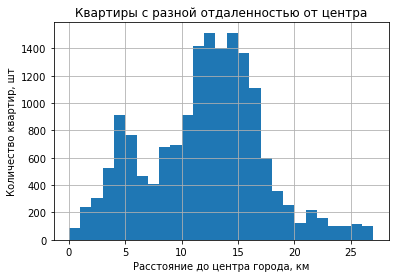

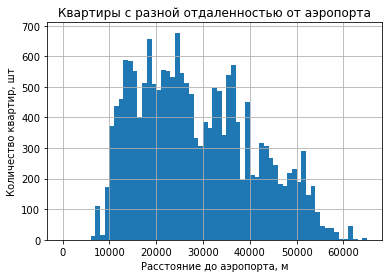

In [78]:
# число корзин равно количеству целых км в выборке
ax = data_clean['cityCenters_nearest_km'].hist(bins=27, grid=True, range=(0, 27))
ax.set_xlabel('Расстояние до центра города, км')
ax.set_ylabel('Количество квартир, шт')
ax.set_title('Квартиры с разной отдаленностью от центра')
plt.show()

ax = data_clean['airports_nearest'].hist(bins=65, grid=True, range=(0, 65000))
ax.set_xlabel('Расстояние до аэропорта, м')
ax.set_ylabel('Количество квартир, шт')
ax.set_title('Квартиры с разной отдаленностью от аэропорта')
plt.show()

Выводы:

Расстояния до центра города:
- Большая часть квартир находится примерно в 11-15 км от центра города.
- Пик значений на 12 и 14 км, таких квартир примерно по 1500.
- Также заметен второй пик значений у количества квартир в 4-5 км от города. Их на 350-400 больше, чем квартир в близости 1 км.
- На остальных расстояних наблюдается спад количества значений. 
- Такая зависимость может быть связана с разной этажностью домов или плотностью застройки в разных районах.

Расстояния до аэропорта:
- Распределение количества квартир относительно расстояний до аэропорта имеет, в целом, нормальное распределение.
- Больше всего квартир находится от 11 до 40 км от ближайшего аэропорта.
- Пик значений на 24 км. Таких квартир примерно 670.
- До 10 и после 40 км наблюдается спад количества значений. Такие квартиры встречаются реже.
- Меньше 5 км от аэропорта квартиры не встречаются.

#### Исследование расстояний до парков

Построим гистограмму для этого параметра.

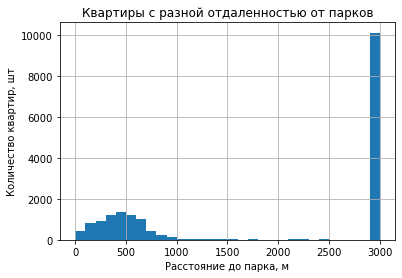

In [79]:
ax = data_clean['parks_nearest'].hist(bins=30, grid=True)
ax.set_xlabel('Расстояние до парка, м')
ax.set_ylabel('Количество квартир, шт')
ax.set_title('Квартиры с разной отдаленностью от парков')
plt.show()

На гистограмме заметно большое количество квартир (чуть больше 10000), которые находятся дальше 3 км от парков. Более точное распределение их расстояний посчитать не можем, так как данными значениями ранее заполняли пропуски в данных. Попробуем убрать эти значения из гистограммы, чтобы более точно оценить остальные квартиры.

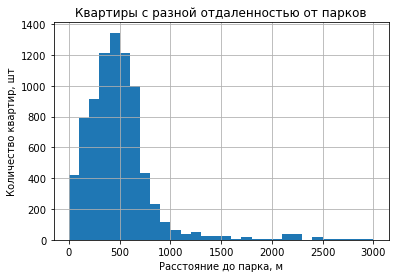

In [80]:
ax = data_clean['parks_nearest'].hist(bins=30, grid=True, range=(0, 2999))
ax.set_xlabel('Расстояние до парка, м')
ax.set_ylabel('Количество квартир, шт')
ax.set_title('Квартиры с разной отдаленностью от парков')
plt.show()

Выводы:
- Большое количество квартир (чуть больше 10000) находятся дальше 3 км от парков. Более точное распределение их расстояний посчитать не можем.
- Распределение остальных квартир нормальное.
- Большая часть из них находится примерно в 300-500 метров от ближайшего парка.
- Пик значений квартир в близости до 3 км от парков находится в 400 метрах. Таких квартир примерно 1350.
- До 300 и после 600 метров наблюдается спад значений. Такие квартиры встречаются реже.

#### Исследование дня недели и месяца публикации объявления

Построим гистограммы для этих параметров.

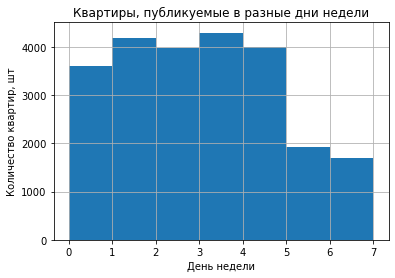

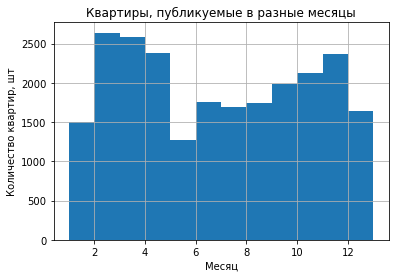

In [81]:
# число корзин равно количеству значений в выборке
ax = data_clean['exposition_weekday'].hist(bins=7, grid=True, range=(0, 7))
ax.set_xlabel('День недели')
ax.set_ylabel('Количество квартир, шт')
ax.set_title('Квартиры, публикуемые в разные дни недели')
plt.show()

ax = data_clean['exposition_month'].hist(bins=12, grid=True, range=(1, 13))
ax.set_xlabel('Месяц')
ax.set_ylabel('Количество квартир, шт')
ax.set_title('Квартиры, публикуемые в разные месяцы')
plt.show()

Выводы:

День публицации:
- Чаще всего квартиры публиковали в будние дни (понедельник-пятница). Это может быть связано с рабочим графиком большинства риэлторов.
- Пики значений заметны во вторник и четверг. Примерно по 4200 квартир.
- На выходных квартиры публиковали примерно в 2 раза реже, чем в будние дни.

Месяц публикации:
- Чаще всего квартиры публиковались в феврале. Их было примерно 2600.
- В следующие месяцы публиковали также много квартир, но с небольшой динамикой спада.
- В мае заметна большая просадка, примерно в 1.5 раза, по сравнению с апрелем.
- В летние и осенние месяцы динамика публикации растет.
- В декабре и январе снова замечается просадка. Квартиры публикуются примерно в 1.5 раза меньше, чем в ноябре. Такое поведение может быть связано с новогодними праздниками.

### Исследование динамики скорости продажи квартир <a id="speed"/>

Построим гистограмму срока продажи квартир. В диаграмме размаха, которую рисовали выше, были заметны выбросы в значениях примерно больше 500 дней. Не будем отображать эти значения на графике.

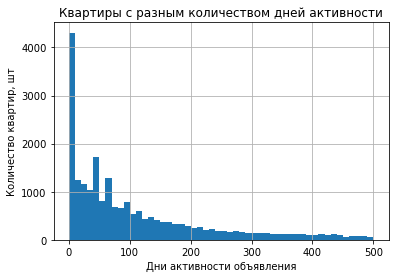

In [82]:
ax = data_clean['days_exposition'].hist(bins=50, grid=True, range=(0, 500))
ax.set_xlabel('Дни активности объявления')
ax.set_ylabel('Количество квартир, шт')
ax.set_title('Квартиры с разным количеством дней активности')
plt.show()

На гистограмме видим выделяющееся количество квартир, которые продались за 10 дней. Их чуть больше 3500. Помним, что мы проставляли нулевые значения в пропусках, это могло повлиять на данные. Попробуем убрать эти значения из графика, чтобы более точно посмотреть на остальную выборку.

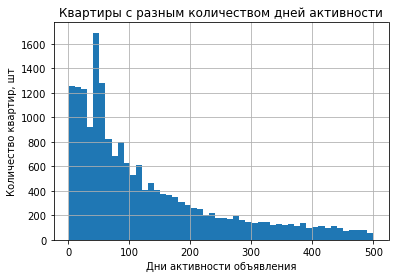

In [83]:
ax = data_clean['days_exposition'].hist(bins=50, grid=True, range=(1, 500))
ax.set_xlabel('Дни активности объявления')
ax.set_ylabel('Количество квартир, шт')
ax.set_title('Квартиры с разным количеством дней активности')
plt.show()

Чаще всего квартиры продавались за первые 90 дней. После 90 дней на графике наблюдается спад значений, и квартиры, которые продавались дольше, встречаются реже. При этом их довольно большое количество. Попробуем посчитать количество квартир, которые продавались больше 100 дней.

In [84]:
data_clean[data_clean['days_exposition'] > 100]['days_exposition'].count()

9944

Квартир с количеством дней активности объявления больше 100 дней - почти половина всей выборки (примерно 44%). Стоит обратить на это внимание. Возможно, в дальнейшем имеет смысл отдельно проанализировать подробнее, в чем неликвидность таких квартир. Это может быть связано с любым из показателей (например, слишком высокая цена, большая площадь, или населенный пункт). 

Посчитаем среднее арифметическое и медианное значение количества дней продажи квартир для всей выборки.

In [85]:
data_clean.agg({'days_exposition': ['mean', 'median']})

,days_exposition
mean,156.51531
median,74.00000


Выводы:
- Чаще всего квартиры продавались в первые 90 дней публикации.
- График соответствует распределнию Пуассона, если вычесть нулевые значения.
- Пик значений находится в первые 10 дней. Таких квартир было чуть больше 3500. Это очень быстрые продажи.
- Второй пик значений находится в диапазоне 40-50 дней. За такой период продалось примерно 1700 квартир.
- После 70  дней наблюдается постепенный спад, все меньше квартир продается за большее количество времени.
- Медианное значение равно 74 дням, среднее 156.5. Эти значения выше пиковых на графике, так как большое количество квартир продавалось дольше 100 дней. Некоторые квартиры даже продавались дольше 500 дней. Такие показатели можно считать необычно долгими.

### Исследование влияния различных факторов на общую стоимость объекта <a id="factors"/>

#### Зависимость цены от площадей (общая, жилая, кухонная)

Округлим площади до целых значений и построим графики по медианной цене в каждой площади.

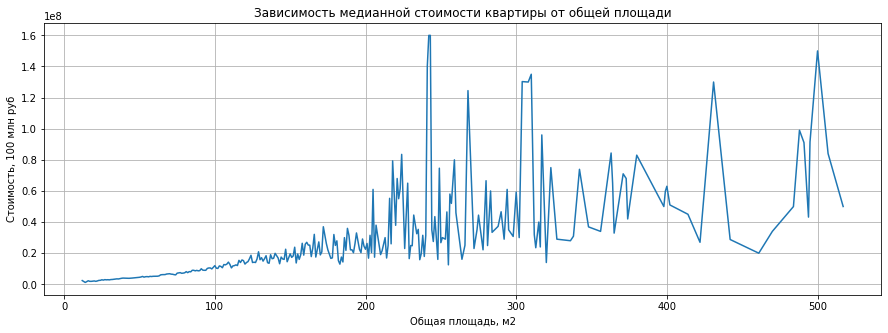

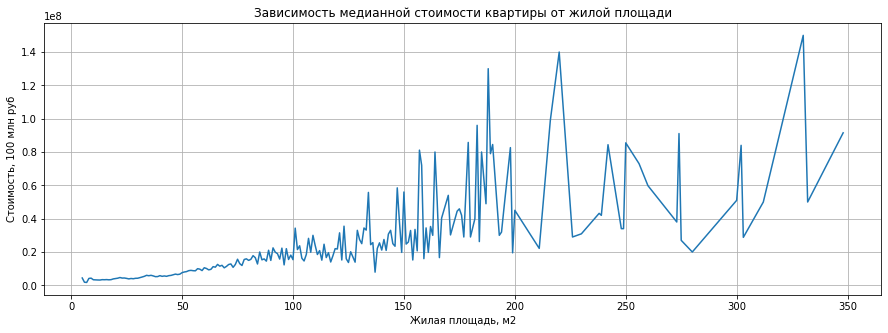

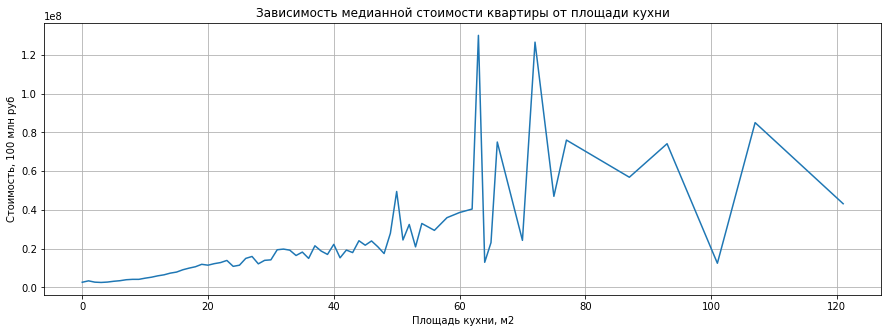

In [86]:
# заводим новый датафрейм, в котором округлим значения
round_area = pd.DataFrame(data_clean)
round_area['total_area'] = np.round(round_area['total_area']).astype('int')
round_area['living_area'] = np.round(round_area['living_area']).astype('int')
round_area['kitchen_area'] = np.round(round_area['kitchen_area']).astype('int')

def get_median_plot(data, column, xlabel, ylabel_price, title_part):
    '''
    функция принимает: 
    датасет, название колонки для графика, текст для подписи оси Х, размер цены для оси У, часть текста для заголовка
    функция возвращает: график зависимости медианной стоимости квартиры от заданного столбца
    '''
    ax = data.pivot_table(
        index=column, values='last_price', aggfunc='median'
    ).plot(grid=True, figsize=(15,5), legend=False)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Стоимость, {} руб'.format(ylabel_price))
    ax.set_title('Зависимость медианной стоимости квартиры от {}'.format(title_part))
    return ax

# генерируем графики
ax_total = get_median_plot(round_area, 'total_area', 'Общая площадь, м2', '100 млн', 'общей площади')
ax_living = get_median_plot(round_area, 'living_area', 'Жилая площадь, м2', '100 млн', 'жилой площади')
ax_kitchen = get_median_plot(round_area, 'kitchen_area', 'Площадь кухни, м2', '100 млн', 'площади кухни')

# рисуем графики
plt.show()

По графикам видим, что стоимость квартир с большими площадями значительно отличается друг от друга. Некоторые такие квартиры могут стоить очень дорого, а некоторые в несколько раз дешевле. По диаграммам размаха, которые рисовали выше, помним, что в выборках были выбросы в значениях общей площади больше 110 кв.м, жилой больше 75 кв.м и кухонной больше 20. Не будем отображать эти значения на графиках, чтобы более точно оценить частые значения.

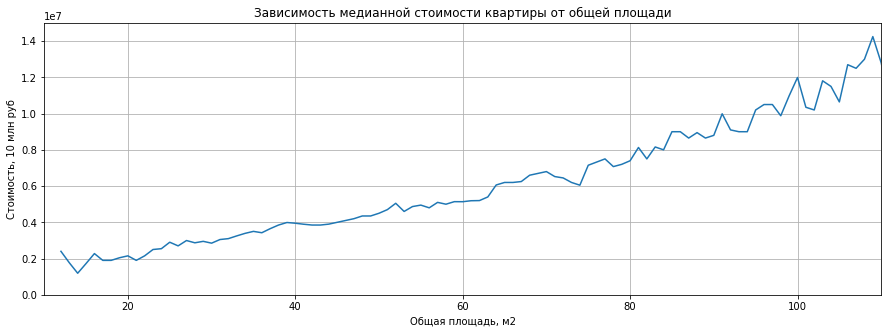

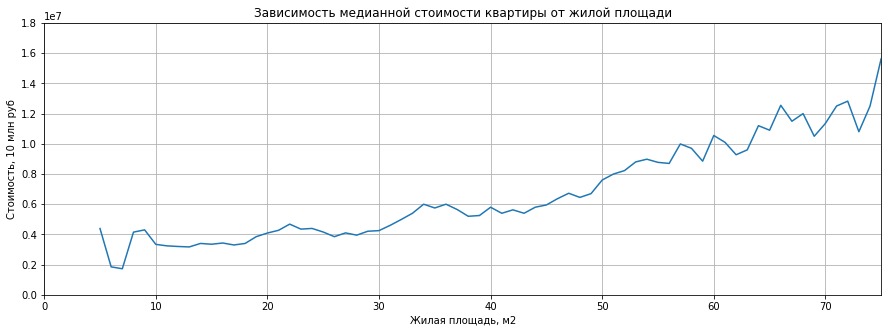

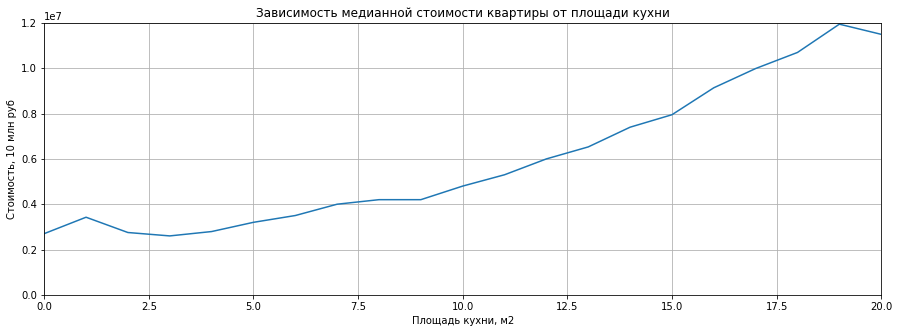

In [87]:
def get_median_plot_with_lim(data, column, xlim, ylim, xlabel, ylabel_price, title_part):
    '''
    функция принимает: 
    датасет, название колонки, лимиты по осям, текст для подписи по оси Х, размер цены для оси У, часть текста для заголовка
    функция возвращает: график зависимости медианной стоимости квартиры от заданного столбца
    '''
    ax = data.pivot_table(
        index=column, values='last_price', aggfunc='median'
    ).plot(grid=True, figsize=(15,5), xlim=xlim, ylim=ylim, legend=False)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Стоимость, {} руб'.format(ylabel_price))
    ax.set_title('Зависимость медианной стоимости квартиры от {}'.format(title_part))
    return ax

# генерируем графики
# на графиках дополнительно обрезаем верхнюю границу стоимости, чтобы было удобнее анализировать
ax_total = get_median_plot_with_lim(
    round_area, 'total_area', (10, 110), (0, 15000000), 'Общая площадь, м2', '10 млн', 'общей площади'
)
ax_living = get_median_plot_with_lim(
    round_area, 'living_area', (0, 75), (0, 18000000), 'Жилая площадь, м2', '10 млн', 'жилой площади'
)
ax_kitchen = get_median_plot_with_lim(
    round_area, 'kitchen_area', (0, 20), (0, 12000000), 'Площадь кухни, м2', '10 млн', 'площади кухни'
)

# рисуем графики
plt.show()

Выводы:
- По графикам можно сказать, что у часто встречающихся квартир без аномально больших площадей видна практически ровная прямая зависимость цены объекта от площади. Чем больше площадь, тем выше цена.

#### Зависимость цены от количества комнат

Построим график зависимости медианной стоимости квартиры от количества комнат.

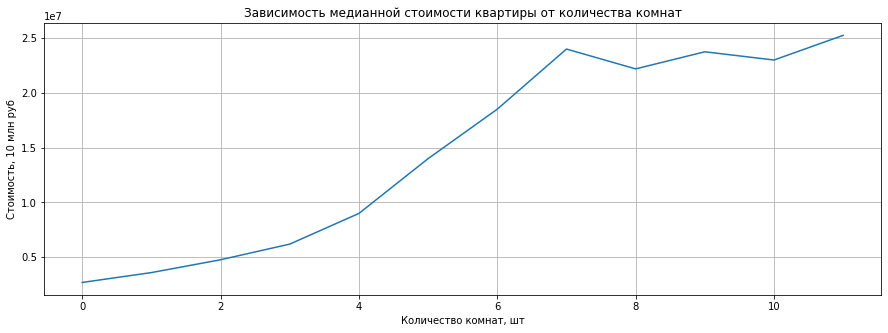

In [88]:
ax = get_median_plot(data_clean, 'rooms', 'Количество комнат, шт', '10 млн', 'количества комнат')
plt.show()

Выводы:
- По графику видна прямая зависимость цены объекта от количества комнат. Чем больше комнат, тем выше цена.
- При этом в квартирах с 7 комнатами и больше цена практически не меняется.

#### Зависимость цены от типа этажа квартиры

Построим график по медианной цене в каждом типе этажа.

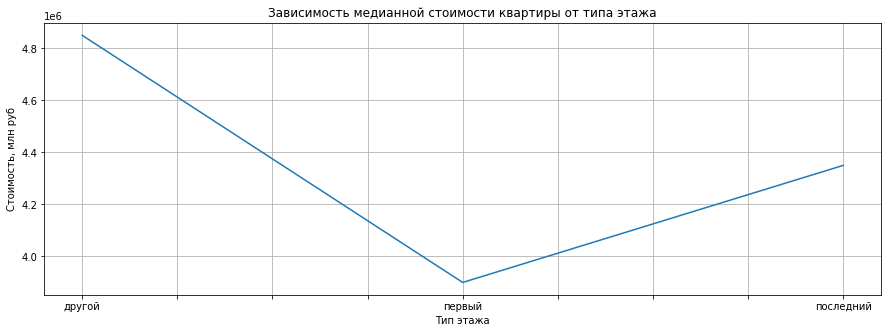

In [89]:
ax = get_median_plot(data_clean, 'floor_type', 'Тип этажа', 'млн', 'типа этажа')
plt.show()

Выводы:
- По графику заметно, что квартиры между первым и последним этажем продаются сильно дороже.
- Квартиры на первых этажах чаще всего стоят дешевле остальных.
- При этом квартиры на последних этажах чаще имеют медианную стоимость примерно между стоимостью квартир на первом и других этажах.

#### Зависимость цен от даты размещения (день, месяц)

Построим графики по медианной цене в каждом типе даты. 

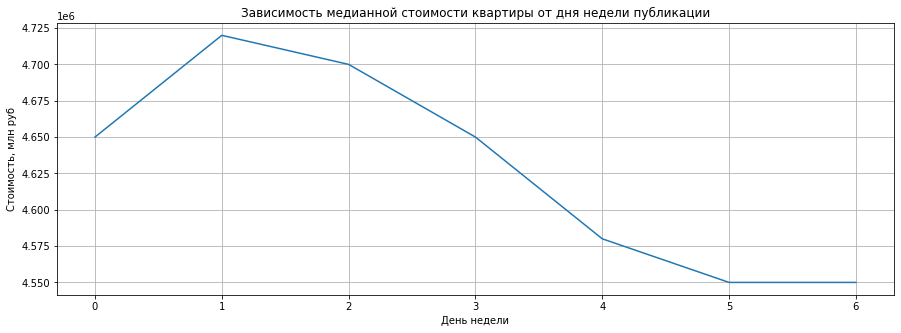

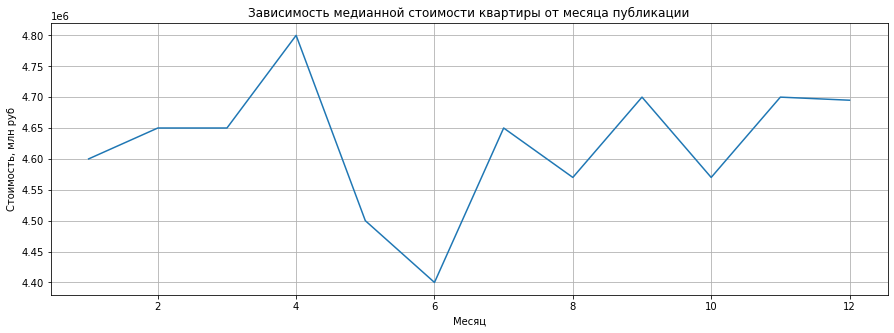

In [90]:
ax_weekday = get_median_plot(data_clean, 'exposition_weekday', 'День недели', 'млн', 'дня недели публикации')
ax_month = get_median_plot(data_clean, 'exposition_month', 'Месяц', 'млн', 'месяца публикации')
plt.show()

Выводы:

Зависимость цены от дня недели публикации:
- Чаще всего квартиры с более дорогой стоимостью выставляются в первой половине недели, особенно во вторник.
- К концу недели наблюдается спад медианной стоимости квартиры. В выходные чаще публиковались квартиры с меньшей стоимостью.
- Такая динамика коррелирует с количеством выкладываемых объявлений. В анализе выше наблюдали, что в будние дни публиковалось больше объявлений, чем на выходных.

Зависимость цены от месяца публикации:
- В апреле цена квартир немного больше, чем в остальные месяцы.
- В июне наблюдается сильный спад цен на квартиры.
- В остальные месяцы стоимость квартир отличается не значительно.

#### Зависимость цен от года размещения

Год размещения проанализируем отдельно, построим график зависимости медианной стоимости квартиры от года размещения объявления. Также дополнительно построим гистограмму с количеством объявлений в каждом году, так как мы не рисовали ее ранее.

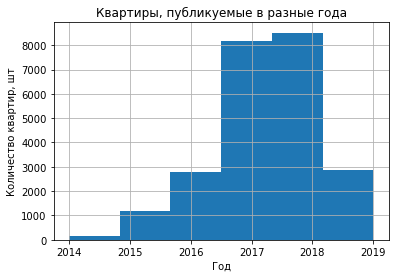

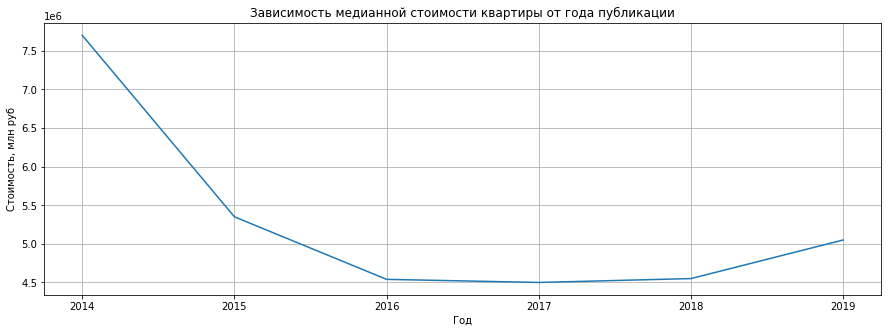

In [91]:
ax = data_clean['exposition_year'].hist(grid=True, bins=6)
ax.set_xlabel('Год')
ax.set_ylabel('Количество квартир, шт')
ax.set_title('Квартиры, публикуемые в разные года')
plt.show()

ax = get_median_plot(data_clean, 'exposition_year', 'Год', 'млн', 'года публикации')
plt.show()

Выводы:

Зависимость цены от года публикации:
- Пик высоких цен на квартиры замечен в 2014 году. При этом количество объявлений, опубликованных в этот год отличается несколько раз с количеством объявлений в другие года. Поэтому сделать полноценный вывод о стоимости квартир в этом году не можем. 
- В другие года медианная стоимость квартир примерно одинаковая - 4.5-5.5 млн рублей.
- Большая часть квартир была опубликована в 2017-2018 году. Их 8200-8500 штук.

### Исследование цен в населенных пунктах <a id="cities"/>

Найдем 10 населенных пунктов с наибольшим числом объявлений, и посчитаем среднюю стоимость квартир в них.

In [92]:
# запоминаем список из 10 населенных пунктов с наибольшим количество объявлений
big_locality = list(data_clean.groupby('locality_name')['locality_name'].count().sort_values()[-10:].index)

# выводим сводную таблицу со средними ценами квадратного метра в них
# сортируем по убыванию цены, чтобы показать топ-10
# добавляем закрашивание
data_clean[
    data_clean['locality_name'].isin(big_locality)
].pivot_table(
    index='locality_name', values='m2_price', aggfunc=['count', 'mean']
).sort_values(by=('count', 'm2_price'), ascending=False).style.background_gradient(cmap='BuGn')

,count,mean
,m2_price,m2_price
locality_name,,
Санкт-Петербург,15738,114215.269521
Мурино,590,86088.456868
Кудрово,472,95323.394778
Шушары,440,78676.773653
Всеволожск,398,68653.303373
Пушкин,370,103067.240495
Колпино,338,75424.529237
Парголово,327,90176.481137


Вывод:
- Средняя стоимость квадратного метра в 10 населенных пунктах с наибольшим количество объявлений растет от 58 тыс. рублей за кв.м в Выборге.
- При этом прямой зависимости роста средней цены от количества объявлений не наблюдается. Например, у второго населенного пункта по количеству объявлений Мурино средняя стоимость квартир меньше, чем в Пушкине, Кудрово и Парголово.
- Самая дорогая средняя цена квадратного метра в Санкт-Петергурге - примерно 114 тыс. рублей. В этом же населенном пункте объявлений больше, чем в половине всего датасета (примерно 66%).

### Средняя цена каждого километра от центра города <a id="center_price">

Посчитаем среднюю стоимость каждого километра от центра города для квартир в Санкт-Петербурге.

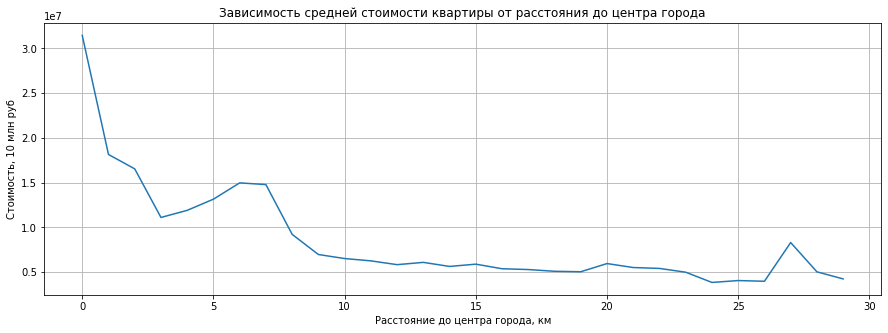

In [93]:
# выносим датафрейм с Санкт-Петербургом в отдельную переменную
# удаляем из него строки с пустыми расстояниями, тк не сможем их обработать
spb_data = data_clean[data_clean['locality_name'] == 'Санкт-Петербург'].dropna(subset=['cityCenters_nearest_km'])

# округляем расстояние до целых километров, чтобы удобнее считать на графике
spb_data.loc[:, 'cityCenters_nearest_km'] = np.round(spb_data['cityCenters_nearest_km']).astype('int')

# рисуем график средних значений в аналогичных расстояниях
ax = spb_data.pivot_table(
    index='cityCenters_nearest_km', values='last_price', aggfunc='mean'
).plot(grid=True, figsize=(15,5), legend=False)
ax.set_xlabel('Расстояние до центра города, км')
ax.set_ylabel('Стоимость, 10 млн руб')
ax.set_title('Зависимость средней стоимости квартиры от расстояния до центра города')
plt.show()

Вывод:
- Чем дальше от центра города, тем дешевле средняя цена квартир.
- В первые 3 км от центра города заметно большое падение цен. С каждым километром квартиры стоят все дешевле.
- От 10 до 20 км от центра города цена квартир примерно равная.
- На 24 км заметна небольшая прибавка в средней стоимости квартир. Вероятно, в этой части города могли продавать квартиры с большей площадью.

## Общий вывод <a id="total"/>

Исходные данные:
- В исследуемых данных было довольно много пропусков и аномальных значений.
- В большинстве значений они могли носить полностью случайный характер. Например, человеческий фактор при заполнении объявления.
- Некоторые пропуски могли быть неслучайными. Например, сервис мог оставить пустые значения расстояний, если не нашел парков и водоемов вблизи 3 км, или населенные пункты находятся слишком далеко от Санкт-Петербурга, или оставить пустые значения количества дней размещения для объявлений, закрытых в течение суток. Рекомендуется обратить на это внимание и проанализировать в дальнейшем, нет ли ошибки в работе сервиса.
- В данных было много неявных дубликатов в названиях населенных пунктов. Были убрали типы населенных пунктов из их названий.
- В данных имеется довольно большое количество выбросов с крайне высокими значениями разных параметров. Они были учтены при анализе, чтобы меньше искажать результаты. В большинстве случаев выделяющиеся значения могли быть вполне реалистичными частными случаями. Небольшая часть таких данных была удалена, но так как их количество было крайне мало (меньше 0.5% в сумме), то это не повлияло на расчеты.

Анализ количества объявлений:
- Большая часть квартир имеет общую площадь от 30 до 65 кв.м. Пик значений примерно в 45 кв.м. После 60 идет постепенный спад, квартиры с большей площадью встречаются реже.
- Распределение жилой площади имеет 2 пика. Это связано с количеством комнат в квартире, так как 1- и 2-комнатные квартиры очень популярны. Большая часть квартир имеет жилую площадь примерно от 15 до 20 кв.м или от 27 до 32 кв.м. Пики значений в 17-18 кв.м. От 32 до 45 кв.м наблюдается плато с примерно одинаковыми значениями. До 15 и после 45 кв.м наблюдается спад количества значений, и квартиры с такой площадью встречаются все реже.
- Большая часть квартир имеет площадь кухни от 5 до 10 кв.м. Пик значений в 8 кв.м. После 13 кв.м начинается постепенный спад, и квартиры с большей площадью встречаются реже. До 5 кв.м квартир крайне мало, если не учитывать квартиры-студии.
- Большая часть квартир имеет стоимость от 2.5 до 6 млн рублей. Пики значений около 3.6 и 3.9 млн рублей. До 2.5 и после 6 млн наблюдается спад, квартиры с такой стоимостью встречаются реже.
- Большая часть квартир имеет 1 или 2 комнаты, чуть реже 3. Квартиры-студии и квартиры с 4 и больше комнатами встречаются реже остальных.
- Большая часть квартир имеет высоту потолка в 2.5 и 2.7 метров. Пик значений на 2.5 метрах. Чуть меньшей популярностью пользуются квартиры с высотой в 2.8 и 3 метра. Квартир с другой высотой мало.
- Большая часть квартир находится на 1-5 этаже. Пик значений на 2 этаже. Квартиры на 6 этаже и выше встречаются реже.
- Чаще всего встречаются квартиры между первым и последним этажем. Квартир на последнем этаже чуть больше, чем на первом. 
- Большая часть домов имеет 5 и 9 этажей. Наиболее популярны 5-этажные дома. Дома с другим количество этажей встречаются реже. 
- Большая часть квартир находится примерно в 11-15 км от центра города. Пик значений на 12 и 14 км. На остальных расстояних наблюдается спад количества значений.
- Чаще всего квартиры находятся от 11 до 40 км от ближайшего аэропорта. Пик значений на 24 км. После 40 км наблюдается спад количества значений. Такие квартиры встречаются реже. 
- Большое количество квартир находятся дальше 3 км от парков. Более точное распределение их расстояний посчитать не можем. Из остальных квартир чаще всего встречаются в близости примерно 300-500 метров от ближайшего парка. Пик значений в 400 метрах. До 300 и после 500 метров наблюдается спад значений. Такие квартиры встречаются реже.
- Чаще всего квартиры публиковали в будние дни. Пики значений заметны во вторник и четверг. На выходных квартиры публиковали реже.
- Чаще всего квартиры публиковались в февреле. В следующие месяцы публиковали также много квартир, но наблюдалась динамика спада. В мае заметна большая просадка. В летние и осенние месяцы динамика публикации обратно растет. В декабре и январе снова замечается просадка.
- Чаще всего квартиры продавались в первые 90 дней публикации. Пик значений находится в 0 дней. Второй пик находится в диапазоне 41-50 дней. После 70 дней наблюдается постепенный спад, все меньше квартир продается за большее количество времени. При этом около 44% квартир было продано дольше, чем за 100 дней. Возможно, стоит в дальнейшем отдельно проанализировать подробнее, в чем неликвидность таких квартир. 

Анализ цен:
- Чем больше площадь (общая, жилая или кухонная), тем выше цена.
- Чем больше комнат, тем выше цена. При этом в квартирах с 7 комнатами и больше цена практически не меняется.
- Квартиры между первым и последним этажем продаются сильно дороже. Самые дешевые квартиры чаще всего встрачаются на первых этажах.
- Чаще всего квартиры с более дорогой стоимостью выставляются в первой половине недели, особенно во вторник. К концу недели наблюдается спад медианной стоимости квартиры. В выходные чаще публиковались квартиры с меньшей стоимостью.
- В апреле цена квартир немного больше, чем в остальные месяцы. В июне наблюдается сильный спад цен на квартиры. В остальные месяцы стоимость квартир не сильно отличается.
- Пик высоких цен на квартиры замечен в 2014 году. При этом количество объявлений, опубликованных в этот год, крайне мало. Поэтому сделать полноценный вывод не можем. В другие года медианная стоимость квартир примерно одинаковая - 4.5-5.5 млн рублей. Большая часть квартир была опубликована в 2017-2018 году.
- Средняя стоимость квадратного метра в 10 населенных пунктах с наибольшим количество объявлений растет от 58 тыс. рублей за кв.м. При этом прямой зависимости роста средней цены от количества объявлений не наблюдается. Самая дорогая средняя цена квадратного метра в Санкт-Петергурге - примерно 114 тыс. рублей. В этом населенном пункте объявлений примерно 66% от всей выборки.
- Чем дальше от центра города, тем дешевле средняя цена квартир. В первые 3 км от центра города заметно большое падение цен. С каждым километром квартиры стоят все дешевле. От 10 до 20 км от центра города цена квартир примерно равная. На 24 км заметна небольшая прибавка в средней стоимости квартир. 